<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview-of-the-contents-of-the-VDJdb-datasets" data-toc-modified-id="Overview-of-the-contents-of-the-VDJdb-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview of the contents of the VDJdb datasets</a></span><ul class="toc-item"><li><span><a href="#Brief-statistics-generated-through-bash-script" data-toc-modified-id="Brief-statistics-generated-through-bash-script-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Brief statistics generated through bash script</a></span><ul class="toc-item"><li><span><a href="#Statistics-for-GitHub-release-vdjdb.txt" data-toc-modified-id="Statistics-for-GitHub-release-vdjdb.txt-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Statistics for GitHub release vdjdb.txt</a></span><ul class="toc-item"><li><span><a href="#vdjdb.txt" data-toc-modified-id="vdjdb.txt-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span>vdjdb.txt</a></span></li><li><span><a href="#vdjdb.slim" data-toc-modified-id="vdjdb.slim-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span>vdjdb.slim</a></span></li></ul></li><li><span><a href="#Statistics-for-VDJdb-data-browser" data-toc-modified-id="Statistics-for-VDJdb-data-browser-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Statistics for VDJdb data browser</a></span></li></ul></li></ul></li><li><span><a href="#Comparison-of-slim-and-normal-file-in-the-VDJdb-GitHub-releases-(August-2019)" data-toc-modified-id="Comparison-of-slim-and-normal-file-in-the-VDJdb-GitHub-releases-(August-2019)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Comparison of slim and normal file in the VDJdb GitHub releases (August 2019)</a></span><ul class="toc-item"><li><span><a href="#Duplicate-CDR3-epitope-pairs" data-toc-modified-id="Duplicate-CDR3-epitope-pairs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Duplicate CDR3-epitope pairs</a></span></li><li><span><a href="#Spurious-sequences" data-toc-modified-id="Spurious-sequences-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Spurious sequences</a></span></li></ul></li><li><span><a href="#Comparison-of-VDJdb-web-export-and-GitHub-Release" data-toc-modified-id="Comparison-of-VDJdb-web-export-and-GitHub-Release-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparison of VDJdb web export and GitHub Release</a></span><ul class="toc-item"><li><span><a href="#Comparison-of-spurious-sequences-and-VDJdb-web-dataset" data-toc-modified-id="Comparison-of-spurious-sequences-and-VDJdb-web-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Comparison of spurious sequences and VDJdb web dataset</a></span><ul class="toc-item"><li><span><a href="#The-web-version-is-equal-to-the-GitHub-release-(normal)-after-filtering-on-cdr3fix.good" data-toc-modified-id="The-web-version-is-equal-to-the-GitHub-release-(normal)-after-filtering-on-cdr3fix.good-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>The web version is equal to the GitHub release (normal) after filtering on cdr3fix.good</a></span></li></ul></li><li><span><a href="#Web-versus-slim" data-toc-modified-id="Web-versus-slim-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Web versus slim</a></span></li><li><span><a href="#The-slim-GitHub-release-still-contains-duplicated-and-spurious-sequences" data-toc-modified-id="The-slim-GitHub-release-still-contains-duplicated-and-spurious-sequences-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>The slim GitHub release still contains duplicated and spurious sequences</a></span></li></ul></li><li><span><a href="#Comparison-to-older-VDJdb-dataset-accessed-on-October-30,-2018:" data-toc-modified-id="Comparison-to-older-VDJdb-dataset-accessed-on-October-30,-2018:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparison to older VDJdb dataset accessed on October 30, 2018:</a></span></li><li><span><a href="#In-depth-statistics-and-figures-for-the-VDJdb-GitHub-Aug-2018-release-(after-filtering)" data-toc-modified-id="In-depth-statistics-and-figures-for-the-VDJdb-GitHub-Aug-2018-release-(after-filtering)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>In-depth statistics and figures for the VDJdb GitHub Aug 2018 release (after filtering)</a></span><ul class="toc-item"><li><span><a href="#Statistics-for-all-data-(all-species)" data-toc-modified-id="Statistics-for-all-data-(all-species)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Statistics for all data (all species)</a></span></li><li><span><a href="#Human-CDR3-epitope-pairs" data-toc-modified-id="Human-CDR3-epitope-pairs-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Human CDR3-epitope pairs</a></span></li><li><span><a href="#Human-TRB-CDR3-epitope-pairs" data-toc-modified-id="Human-TRB-CDR3-epitope-pairs-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Human TRB CDR3-epitope pairs</a></span></li><li><span><a href="#10x-data-exploration" data-toc-modified-id="10x-data-exploration-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>10x data exploration</a></span></li><li><span><a href="#Removing-over-abundant-10x-data-entries" data-toc-modified-id="Removing-over-abundant-10x-data-entries-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Removing over-abundant 10x data entries</a></span></li><li><span><a href="#How-much-data-is-lost-due-to-filtering-on-spurious-entries?" data-toc-modified-id="How-much-data-is-lost-due-to-filtering-on-spurious-entries?-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>How much data is lost due to filtering on spurious entries?</a></span></li></ul></li><li><span><a href="#Create-figures-for-filtered-data-(including-length-restrictions)" data-toc-modified-id="Create-figures-for-filtered-data-(including-length-restrictions)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Create figures for filtered data (including length restrictions)</a></span><ul class="toc-item"><li><span><a href="#Comparison-to-Dean-et-al.-negative-reference-TCR-set" data-toc-modified-id="Comparison-to-Dean-et-al.-negative-reference-TCR-set-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Comparison to Dean et al. negative reference TCR set</a></span></li><li><span><a href="#TRB-only" data-toc-modified-id="TRB-only-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>TRB only</a></span><ul class="toc-item"><li><span><a href="#Epitope-and-CDR3-length-distribution" data-toc-modified-id="Epitope-and-CDR3-length-distribution-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Epitope and CDR3 length distribution</a></span><ul class="toc-item"><li><span><a href="#No-grouping" data-toc-modified-id="No-grouping-6.2.1.1"><span class="toc-item-num">6.2.1.1&nbsp;&nbsp;</span>No grouping</a></span></li><li><span><a href="#Per-MHC:" data-toc-modified-id="Per-MHC:-6.2.1.2"><span class="toc-item-num">6.2.1.2&nbsp;&nbsp;</span>Per MHC:</a></span></li></ul></li></ul></li><li><span><a href="#Can-MHCI-and-MHCII-share-epitopes?" data-toc-modified-id="Can-MHCI-and-MHCII-share-epitopes?-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Can MHCI and MHCII share epitopes?</a></span></li><li><span><a href="#TRB-and-TRA" data-toc-modified-id="TRB-and-TRA-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>TRB and TRA</a></span><ul class="toc-item"><li><span><a href="#Epitope-counts" data-toc-modified-id="Epitope-counts-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Epitope counts</a></span><ul class="toc-item"><li><span><a href="#Combined-figure---histogram-of-abundances-and-epitope-counts" data-toc-modified-id="Combined-figure---histogram-of-abundances-and-epitope-counts-6.4.1.1"><span class="toc-item-num">6.4.1.1&nbsp;&nbsp;</span>Combined figure - histogram of abundances and epitope counts</a></span></li></ul></li></ul></li><li><span><a href="#MHC-distribution" data-toc-modified-id="MHC-distribution-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>MHC distribution</a></span></li><li><span><a href="#Combined-figure" data-toc-modified-id="Combined-figure-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Combined figure</a></span><ul class="toc-item"><li><span><a href="#Simple-figure" data-toc-modified-id="Simple-figure-6.6.1"><span class="toc-item-num">6.6.1&nbsp;&nbsp;</span>Simple figure</a></span></li><li><span><a href="#Length-only" data-toc-modified-id="Length-only-6.6.2"><span class="toc-item-num">6.6.2&nbsp;&nbsp;</span>Length only</a></span></li><li><span><a href="#Chain-split-and-per-figure-MHC" data-toc-modified-id="Chain-split-and-per-figure-MHC-6.6.3"><span class="toc-item-num">6.6.3&nbsp;&nbsp;</span>Chain split and per-figure MHC</a></span></li><li><span><a href="#MHC-split-and-per-figure-chains-+-more-details" data-toc-modified-id="MHC-split-and-per-figure-chains-+-more-details-6.6.4"><span class="toc-item-num">6.6.4&nbsp;&nbsp;</span>MHC split and per-figure chains + more details</a></span></li></ul></li><li><span><a href="#Dean-reference-set-TCR-distribution" data-toc-modified-id="Dean-reference-set-TCR-distribution-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>Dean reference set TCR distribution</a></span></li></ul></li><li><span><a href="#TODO" data-toc-modified-id="TODO-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>TODO</a></span></li></ul></div>

In [4]:
import json

import pandas as pd
from pandas.io.json import json_normalize
from pathlib import Path

from src.config import PROJECT_ROOT
from src.preprocessing import preprocess_vdjdb

# Overview of the contents of the VDJdb datasets

As described in `data/raw/README.md`:

`data/raw/vdjdb`: contains a data dump of VDJdb TCR-epitope pairs ([https://vdjdb.cdr3.net](https://vdjdb.cdr3.net)), see [./vdjdb/README.md](./data/raw/VDJdb/README.md) for additional information about the origin and statistics of the files.

The files in this directory were retrieved from https://vdjdb.cdr3.net and https://github.com/antigenomics/vdjdb-db/releases on 21 November 2019. At this time, the last update to VDJdb had happened on 07 August 2019 (GitHub release August 8).

- `vdjdb-2019-08-08.zip` is the August GitHub release and contains three different types of files:
    - `vdjdb.txt`: the full set of CDR3-epitope pairs in VDJdb, refered to as the normal or standard file in this document.
    - `vdjdb.slim.txt`: a reduced version of the former file.
    - `vdjdb_full.txt`: contains some additional information compared to the standard file; among other things it uses a separate column for `cdr3.alpha` and `cdr3.beta` sequences.
- `vdjdb-browser.txt`: contains TRA and TRB chains and their epitope targets retrieved from the VDJdb web browser with the following options:
    - All species
    - Both TRA and TRB chains
    - Both MHC types
    - No sequence length restriction
    - All assay types
    - No minimum confidence score
    - **No spurious CDR3 (non-canonical or unmapped V/J)**

## Brief statistics generated through bash script

These statistics can be obtained by running `bash data/raw/vdjdb/vdjdb-content-analyser.sh output-summary.md input-file.tsv`.


### Statistics for GitHub release vdjdb.txt

#### vdjdb.txt


| Metric                                                         | Count                                                                                                                                       | Command                                                                                                                                        |
|----------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------|
| Total number of records                                        | 75474                                                                                                         | `tail -n +2 vdjdb-2019-08-08/vdjdb.txt  |  wc -l`                                                                                                         |
| TRA records                                                    | 31096                                                                                     | `awk '$2 == "TRA" { print $3 }' vdjdb-2019-08-08/vdjdb.txt | wc -l`                                                                                     |
| TRB records                                                    | 44378                                                                                     | `awk '$2 == "TRB" { print $3 }' vdjdb-2019-08-08/vdjdb.txt | wc -l`                                                                                     |
| Unique TRA sequences                                           | 22248                                                                           | `awk '$2 == "TRA" { print $3 }' vdjdb-2019-08-08/vdjdb.txt | sort -u | wc -l`                                                                           |
| Unique TRB sequences                                           | 33606                                                                           | `awk '$2 == "TRB" { print $3 }' vdjdb-2019-08-08/vdjdb.txt | sort -u | wc -l`                                                                           |
| Unique CDR3 sequences                                          | 55852                                                                                     | `tail -n +2 vdjdb-2019-08-08/vdjdb.txt | cut -f3 | sort -u | wc -l`                                                                                       |
| Unique epitope sequences                                       | 212                                                                                    | `tail -n +2 vdjdb-2019-08-08/vdjdb.txt | cut -f10 | sort -u | wc -l`                                                                                      |
| Unique epitope sequences for TRA records                       | 179                                                                          | `awk '$2 == "TRA" { print $10 }' vdjdb-2019-08-08/vdjdb.txt | sort -u | wc -l`                                                                          |
| Unique epitope sequences for TRB records                       | 219                                                                          | `awk '$2 == "TRB" { print $10 }' vdjdb-2019-08-08/vdjdb.txt | sort -u | wc -l`                                                                          |
| Unique CDR3-epitope sequence pairs                             | 61047                                                                         | `tail -n +2 vdjdb-2019-08-08/vdjdb.txt | cut -d $'\t' -f3,10 | sort -u | wc -l`                                                                           |
| Unique TRA-CDR3-epitope sequence pairs                         | 25044                                                                       | `awk '$2 == "TRA" { print ,vdjdb-2019-08-08-vdjdb-summary.md0 }' vdjdb-2019-08-08/vdjdb.txt | sort -u | wc -l`                                                                        |
| Unique TRB-CDR3-epitope sequence pairs                         | 36000                                                                       | `awk '$2 == "TRB" { print ,vdjdb-2019-08-08-vdjdb-summary.md0 }' vdjdb-2019-08-08/vdjdb.txt | sort -u | wc -l`                                                                        |
| Number of epitope sequences shared between TRA and TRB records | 147   | `comm -12 <(awk '$2 == "TRA" { print $10 }' vdjdb-2019-08-08/vdjdb.txt | sort -u) <(awk '$2 == "TRB" { print $10 }' vdjdb-2019-08-08/vdjdb.txt | sort -u) | wc -l` |
| Number of CDR3 sequences shared between TRA and TRB records    | 2     | `comm -12 <(awk '$2 == "TRA" { print $3 }' vdjdb-2019-08-08/vdjdb.txt | sort -u) <(awk '$2 == "TRB" { print $3 }' vdjdb-2019-08-08/vdjdb.txt | sort -u) | wc -l`   |
| Epitope distribution for the unique CDR3-epitope pairs         |                                 | `tail -n +2 vdjdb-2019-08-08/vdjdb.txt | cut -d $'\t' -f3,10 | sort -u | cut -f2 | sort | uniq -c | sort -nr | head -20`                                  |


      24639 KLGGALQAK
       6744 NLVPMVATV
       6600 GILGFVFTL
       3255 AVFDRKSDAK
       1654 ELAGIGILTV
       1501 RAKFKQLL
       1190 GLCTLVAML
       1088 IVTDFSVIK
        819 RLRAEAQVK
        685 LLWNGPMAV
        617 LLLGIGILV
        597 TTPESANL
        597 SSLENFRAYV
        586 SSYRRPVGI
        564 FRDYVDRFYKTLRAEQASQE
        548 PKYVKQNTLKLAT
        530 CTPYDINQM
        417 HGIRNASFI
        383 ASNENMETM
        334 KRWIILGLNK

**Human-only records**

| Metric                                                             | Count                                                                                                                                                                          | Command                                                                                                                                                                                                 |
|--------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|   Total number of records                                          | 67766                                                                                                                  | `awk '$6 == "HomoSapiens" { print }' vdjdb-2019-08-08/vdjdb.txt |  wc -l`                                                                                                                                         |
|   TRA records                                                      | 28044                                                                                                 | `awk '$2 == "TRA" && $6 == "HomoSapiens"  { print $3 }' vdjdb-2019-08-08/vdjdb.txt | wc -l`                                                                                                                     |
|   TRB records                                                      | 39722                                                                                                | `awk '$2 == "TRB" && $6 == "HomoSapiens"  { print $3 }' vdjdb-2019-08-08/vdjdb.txt | wc -l`                                                                                                                     |
|   Unique TRA sequences                                             | 20277                                                                                      | `awk '$2 == "TRA" && $6 == "HomoSapiens"  { print $3 }' vdjdb-2019-08-08/vdjdb.txt | sort -u | wc -l`                                                                                                           |
|   Unique TRB sequences                                             | 30720                                                                                      | `awk '$2 == "TRB" && $6 == "HomoSapiens"  { print $3 }' vdjdb-2019-08-08/vdjdb.txt | sort -u | wc -l`                                                                                                           |
|   Unique CDR3 sequences                                            | 50995                                                                                               | `awk '$6 == "HomoSapiens" { print }' vdjdb-2019-08-08/vdjdb.txt | cut -f3 | sort -u | wc -l`                                                                                                                      |
|   Unique epitope sequences                                         | 177                                                                                              | `awk '$6 == "HomoSapiens" { print }' vdjdb-2019-08-08/vdjdb.txt | cut -f10 | sort -u | wc -l`                                                                                                                     |
|   Unique epitope sequences for TRA records                         | 117                                                                                      | `awk '$2 == "TRA" && $6 == "HomoSapiens" { print $10 }' vdjdb-2019-08-08/vdjdb.txt | sort -u | wc -l`                                                                                                           |
|   Unique epitope sequences for TRB records                         | 175                                                                                      | `awk '$2 == "TRB" && $6 == "HomoSapiens" { print $10 }' vdjdb-2019-08-08/vdjdb.txt | sort -u | wc -l`                                                                                                           |
|   Unique CDR3-epitope sequence pairs                               | 55931                                                                                   | `awk '$6 == "HomoSapiens" { print }' vdjdb-2019-08-08/vdjdb.txt | cut -d $'\t' -f3,10 | sort -u | wc -l`                                                                                                          |
|   Unique TRA-CDR3-epitope sequence pairs                           | 22945                                                                                   | `awk '$2 == "TRA" && $6 == "HomoSapiens" { print $3,$10 }' vdjdb-2019-08-08/vdjdb.txt | sort -u | wc -l`                                                                                                       |
|   Unique TRB-CDR3-epitope sequence pairs                           | 32988                                                                                   | `awk '$2 == "TRB" && $6 == "HomoSapiens" { print $3,$10 }' vdjdb-2019-08-08/vdjdb.txt | sort -u | wc -l`                                                                                                       |
|   Number of epitope sequences shared between TRA and TRB records   | 115|`comm -12 <(awk '$2 == "TRA" && $6 == "HomoSapiens" { print $10 }' vdjdb-2019-08-08/vdjdb.txt | sort -u) <(awk '$2 == "TRB" && $6 == "HomoSapiens" { print $10 }' vdjdb-2019-08-08/vdjdb.txt | sort -u) | wc -l`   |
|   Number of CDR3 sequences shared between TRA and TRB records      | 2|`comm -12 <(awk '$2 == "TRA" && $6 == "HomoSapiens" { print $3 }' vdjdb-2019-08-08/vdjdb.txt | sort -u) <(awk '$2 == "TRB" && $6 == "HomoSapiens" { print $3 }' vdjdb-2019-08-08/vdjdb.txt | sort -u) | wc -l`     |
|   Epitope distribution for the unique CDR3-epitope pairs           |                             | `awk '$6 == "HomoSapiens" { print }' vdjdb-2019-08-08/vdjdb.txt | cut -d $'\t' -f3,10 | sort -u | cut -f2 | sort | uniq -c | sort -nr | head -20`                                                                 |

      24367 KLGGALQAK
       6680 NLVPMVATV
       6531 GILGFVFTL
       3222 AVFDRKSDAK
       1642 ELAGIGILTV
       1492 RAKFKQLL
       1165 GLCTLVAML
       1083 IVTDFSVIK
        810 RLRAEAQVK
        676 LLWNGPMAV
        588 LLLGIGILV
        562 FRDYVDRFYKTLRAEQASQE
        532 PKYVKQNTLKLAT
        334 KRWIILGLNK
        240 GLIYNRMGAVTTEV
        227 QARQMVQAMRTIGTHP
        209 KAFSPEVIPMF
        207 TPRVTGGGAM
        203 VTEHDTLLY
        203 CINGVCWTV


#### vdjdb.slim


| Metric                                                         | Count                                                                                                                                    | Command                                                                                                                       |
|----------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------|
| Total number of records                                        | 61049                                                                                                        | `tail -n +2 vdjdb-2019-08-08/vdjdb.slim.txt  |  wc -l`                                                                                                 |
| TRA records                                                    | 25051                                                                                    | `awk '$1 == "TRA" { print $2 }' vdjdb-2019-08-08/vdjdb.slim.txt | wc -l`                                                                             |
| TRB records                                                    | 35998                                                                                    | `awk '$1 == "TRB" { print $2 }' vdjdb-2019-08-08/vdjdb.slim.txt | wc -l`                                                                             |
| Unique TRA sequences                                           | 22248                                                                          | `awk '$1 == "TRA" { print $2 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u | wc -l`                                                                   |
| Unique TRB sequences                                           | 33606                                                                          | `awk '$1 == "TRB" { print $2 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u | wc -l`                                                                   |
| Unique CDR3 sequences                                          | 55852                                                                                    | `tail -n +2 vdjdb-2019-08-08/vdjdb.slim.txt | cut -f2 | sort -u | wc -l`                                                                               |
| Unique epitope sequences                                       | 212                                                                                    | `tail -n +2 vdjdb-2019-08-08/vdjdb.slim.txt | cut -f4 | sort -u | wc -l`                                                                              |
| Unique epitope sequences for TRA records                       | 151                                                                          | `awk '$1 == "TRA" { print $4 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u | wc -l`                                                                  |
| Unique epitope sequences for TRB records                       | 212                                                                          | `awk '$1 == "TRB" { print $4 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u | wc -l`                                                                  |
| Unique CDR3-epitope sequence pairs                             | 61047                                                                         | `tail -n +2 vdjdb-2019-08-08/vdjdb.slim.txt | cut -d $'\t' -f2,4 | sort -u | wc -l`                                                                   |
| Unique TRA-CDR3-epitope sequence pairs                         | 25051                                                                       | `awk '$1 == "TRA" { print vdjdb-2019-08-08/vdjdb.slim.txt, }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u | wc -l`                                                                |
| Unique TRB-CDR3-epitope sequence pairs                         | 35998                                                                       | `awk '$1 == "TRB" { print vdjdb-2019-08-08/vdjdb.slim.txt, }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u | wc -l`                                                                |
| Number of epitope sequences shared between TRA and TRB records | 151      | `comm -12 <(awk '$1 == "TRA" { print $4 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u) <(awk '$1 == "TRB" { print $4 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u) | wc -l`  |
| Number of CDR3 sequences shared between TRA and TRB records    | 2      | `comm -12 <(awk '$1 == "TRA" { print $2 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u) <(awk '$1 == "TRB" { print $2 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u) | wc -l`    |
| Epitope distribution for the unique CDR3-epitope pairs         |                                 | `tail -n +2 vdjdb-2019-08-08/vdjdb.slim.txt | cut -d $'\t' -f2,4 | sort -u | cut -f2 | sort | uniq -c | sort -nr | head -20`                                  |

      24639 KLGGALQAK
       6744 NLVPMVATV
       6600 GILGFVFTL
       3255 AVFDRKSDAK
       1654 ELAGIGILTV
       1501 RAKFKQLL
       1190 GLCTLVAML
       1088 IVTDFSVIK
        819 RLRAEAQVK
        685 LLWNGPMAV
        617 LLLGIGILV
        597 TTPESANL
        597 SSLENFRAYV
        586 SSYRRPVGI
        564 FRDYVDRFYKTLRAEQASQE
        548 PKYVKQNTLKLAT
        530 CTPYDINQM
        417 HGIRNASFI
        383 ASNENMETM
        334 KRWIILGLNK

**Human-only records**

| Metric                                                             | Count                                                                                                                                                                        | Command                                                                                                                                                                             |
|--------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|   Total number of records                                          | 56592                                                                                                                  | `awk '$3 == "HomoSapiens" { print }' vdjdb-2019-08-08/vdjdb.slim.txt |  wc -l`                                                                                                                              |
|   TRA records                                                      | 23564                                                                                                 | `awk '$1 == "TRA" && $3 == "HomoSapiens"  { print $2 }' vdjdb-2019-08-08/vdjdb.slim.txt | wc -l`                                                                                                          |
|   TRB records                                                      | 33028                                                                                                | `awk '$1 == "TRB" && $3 == "HomoSapiens"  { print $2 }' vdjdb-2019-08-08/vdjdb.slim.txt | wc -l`                                                                                                          |
|   Unique TRA sequences                                             | 20841                                                                                      | `awk '$1 == "TRA" && $3 == "HomoSapiens"  { print $2 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u | wc -l`                                                                                                |
|   Unique TRB sequences                                             | 30757                                                                                      | `awk '$1 == "TRB" && $3 == "HomoSapiens"  { print $2 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u | wc -l`                                                                                                |
|   Unique CDR3 sequences                                            | 51596                                                                                               | `awk '$3 == "HomoSapiens" { print }' vdjdb-2019-08-08/vdjdb.slim.txt | cut -f2 | sort -u | wc -l`                                                                                                           |
|   Unique epitope sequences                                         | 177                                                                                              | `awk '$3 == "HomoSapiens" { print }' vdjdb-2019-08-08/vdjdb.slim.txt | cut -f4 | sort -u | wc -l`                                                                                                          |
|   Unique epitope sequences for TRA records                         | 125                                                                                      | `awk '$1 == "TRA" && $3 == "HomoSapiens" { print $4 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u | wc -l`                                                                                                |
|   Unique epitope sequences for TRB records                         | 177                                                                                      | `awk '$1 == "TRB" && $3 == "HomoSapiens" { print $4 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u | wc -l`                                                                                                |
|   Unique CDR3-epitope sequence pairs                               | 56590                                                                                   | `awk '$3 == "HomoSapiens" { print }' vdjdb-2019-08-08/vdjdb.slim.txt | cut -d $'\t' -f2,4 | sort -u | wc -l`                                                                                               |
|   Unique TRA-CDR3-epitope sequence pairs                           | 23564                                                                                   | `awk '$1 == "TRA" && $3 == "HomoSapiens" { print $2,$4 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u | wc -l`                                                                                            |
|   Unique TRB-CDR3-epitope sequence pairs                           | 33028                                                                                   | `awk '$1 == "TRB" && $3 == "HomoSapiens" { print $2,$4 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u | wc -l`                                                                                            |
|   Number of epitope sequences shared between TRA and TRB records   | 125|`comm -12 <(awk '$1 == "TRA" && $3 == "HomoSapiens" { print $4 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u) <(awk '$1 == "TRB" && $3 == "HomoSapiens" { print $4 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u) | wc -l` |
|   Number of CDR3 sequences shared between TRA and TRB records      | 2|`comm -12 <(awk '$1 == "TRA" && $3 == "HomoSapiens" { print $2 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u) <(awk '$1 == "TRB" && $3 == "HomoSapiens" { print $2 }' vdjdb-2019-08-08/vdjdb.slim.txt | sort -u) | wc -l`   |
|   Epitope distribution for the unique CDR3-epitope pairs           |                             | `awk '$6 == "HomoSapiens" { print }' vdjdb-2019-08-08/vdjdb.slim.txt | cut -d $'\t' -f3,10 | sort -u | cut -f2 | sort | uniq -c | sort -nr | head -20`                                                                 |

      24639 KLGGALQAK
       6744 NLVPMVATV
       6600 GILGFVFTL
       3255 AVFDRKSDAK
       1654 ELAGIGILTV
       1501 RAKFKQLL
       1190 GLCTLVAML
       1088 IVTDFSVIK
        819 RLRAEAQVK
        685 LLWNGPMAV
        617 LLLGIGILV
        564 FRDYVDRFYKTLRAEQASQE
        548 PKYVKQNTLKLAT
        334 KRWIILGLNK
        244 GLIYNRMGAVTTEV
        229 QARQMVQAMRTIGTHP
        217 TPRVTGGGAM
        209 KAFSPEVIPMF
        206 CINGVCWTV
        203 VTEHDTLLY



### Statistics for VDJdb data browser


| Metric                                                         | Count                                                                                                                                       | Command                                                                                                                                        |
|----------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------|
| Total number of records                                        | 73224                                                                                                         | `tail -n +2 vdjdb-browser.tsv  |  wc -l`                                                                                                         |
| TRA records                                                    | 29479                                                                                     | `awk '$2 == "TRA" { print $3 }' vdjdb-browser.tsv | wc -l`                                                                                     |
| TRB records                                                    | 43745                                                                                     | `awk '$2 == "TRB" { print $3 }' vdjdb-browser.tsv | wc -l`                                                                                     |
| Unique TRA sequences                                           | 20888                                                                           | `awk '$2 == "TRA" { print $3 }' vdjdb-browser.tsv | sort -u | wc -l`                                                                           |
| Unique TRB sequences                                           | 33112                                                                           | `awk '$2 == "TRB" { print $3 }' vdjdb-browser.tsv | sort -u | wc -l`                                                                           |
| Unique CDR3 sequences                                          | 54000                                                                                     | `tail -n +2 vdjdb-browser.tsv | cut -f3 | sort -u | wc -l`                                                                                       |
| Unique epitope sequences                                       | 212                                                                                    | `tail -n +2 vdjdb-browser.tsv | cut -f10 | sort -u | wc -l`                                                                                      |
| Unique epitope sequences for TRA records                       | 141                                                                          | `awk '$2 == "TRA" { print $10 }' vdjdb-browser.tsv | sort -u | wc -l`                                                                          |
| Unique epitope sequences for TRB records                       | 210                                                                          | `awk '$2 == "TRB" { print $10 }' vdjdb-browser.tsv | sort -u | wc -l`                                                                          |
| Unique CDR3-epitope sequence pairs                             | 59072                                                                         | `tail -n +2 vdjdb-browser.tsv | cut -d $'\t' -f3,10 | sort -u | wc -l`                                                                           |
| Unique TRA-CDR3-epitope sequence pairs                         | 23578                                                                       | `awk '$2 == "TRA" { print ,vdjdb-browser-summary.md0 }' vdjdb-browser.tsv | sort -u | wc -l`                                                                        |
| Unique TRB-CDR3-epitope sequence pairs                         | 35494                                                                       | `awk '$2 == "TRB" { print ,vdjdb-browser-summary.md0 }' vdjdb-browser.tsv | sort -u | wc -l`                                                                        |
| Number of epitope sequences shared between TRA and TRB records | 139   | `comm -12 <(awk '$2 == "TRA" { print $10 }' vdjdb-browser.tsv | sort -u) <(awk '$2 == "TRB" { print $10 }' vdjdb-browser.tsv | sort -u) | wc -l` |
| Number of CDR3 sequences shared between TRA and TRB records    | 0     | `comm -12 <(awk '$2 == "TRA" { print $3 }' vdjdb-browser.tsv | sort -u) <(awk '$2 == "TRB" { print $3 }' vdjdb-browser.tsv | sort -u) | wc -l`   |
| Epitope distribution for the unique CDR3-epitope pairs         |                                 | `tail -n +2 vdjdb-browser.tsv | cut -d $'\t' -f3,10 | sort -u | cut -f2 | sort | uniq -c | sort -nr | head -20`                                  |

      24041 KLGGALQAK
       6514 NLVPMVATV
       6389 GILGFVFTL
       3175 AVFDRKSDAK
       1624 ELAGIGILTV
       1472 RAKFKQLL
       1142 GLCTLVAML
       1067 IVTDFSVIK
        800 RLRAEAQVK
        652 LLWNGPMAV
        585 SSLENFRAYV
        577 LLLGIGILV
        562 SSYRRPVGI
        523 PKYVKQNTLKLAT
        511 TTPESANL
        508 FRDYVDRFYKTLRAEQASQE
        500 CTPYDINQM
        398 HGIRNASFI
        345 ASNENMETM
        325 KRWIILGLNK

**Human-only records**

| Metric                                                             | Count                                                                                                                                                                          | Command                                                                                                                                                                                                 |
|--------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|   Total number of records                                          | 66597                                                                                                                  | `awk '$6 == "HomoSapiens" { print }' vdjdb-browser.tsv |  wc -l`                                                                                                                                         |
|   TRA records                                                      | 27295                                                                                                 | `awk '$2 == "TRA" && $6 == "HomoSapiens"  { print $3 }' vdjdb-browser.tsv | wc -l`                                                                                                                     |
|   TRB records                                                      | 39302                                                                                                | `awk '$2 == "TRB" && $6 == "HomoSapiens"  { print $3 }' vdjdb-browser.tsv | wc -l`                                                                                                                     |
|   Unique TRA sequences                                             | 19637                                                                                      | `awk '$2 == "TRA" && $6 == "HomoSapiens"  { print $3 }' vdjdb-browser.tsv | sort -u | wc -l`                                                                                                           |
|   Unique TRB sequences                                             | 30377                                                                                      | `awk '$2 == "TRB" && $6 == "HomoSapiens"  { print $3 }' vdjdb-browser.tsv | sort -u | wc -l`                                                                                                           |
|   Unique CDR3 sequences                                            | 50014                                                                                               | `awk '$6 == "HomoSapiens" { print }' vdjdb-browser.tsv | cut -f3 | sort -u | wc -l`                                                                                                                      |
|   Unique epitope sequences                                         | 177                                                                                              | `awk '$6 == "HomoSapiens" { print }' vdjdb-browser.tsv | cut -f10 | sort -u | wc -l`                                                                                                                     |
|   Unique epitope sequences for TRA records                         | 117                                                                                      | `awk '$2 == "TRA" && $6 == "HomoSapiens" { print $10 }' vdjdb-browser.tsv | sort -u | wc -l`                                                                                                           |
|   Unique epitope sequences for TRB records                         | 175                                                                                      | `awk '$2 == "TRB" && $6 == "HomoSapiens" { print $10 }' vdjdb-browser.tsv | sort -u | wc -l`                                                                                                           |
|   Unique CDR3-epitope sequence pairs                               | 54887                                                                                   | `awk '$6 == "HomoSapiens" { print }' vdjdb-browser.tsv | cut -d $'\t' -f3,10 | sort -u | wc -l`                                                                                                          |
|   Unique TRA-CDR3-epitope sequence pairs                           | 22248                                                                                   | `awk '$2 == "TRA" && $6 == "HomoSapiens" { print $3,$10 }' vdjdb-browser.tsv | sort -u | wc -l`                                                                                                       |
|   Unique TRB-CDR3-epitope sequence pairs                           | 32639                                                                                   | `awk '$2 == "TRB" && $6 == "HomoSapiens" { print $3,$10 }' vdjdb-browser.tsv | sort -u | wc -l`                                                                                                       |
|   Number of epitope sequences shared between TRA and TRB records   | 115|`comm -12 <(awk '$2 == "TRA" && $6 == "HomoSapiens" { print $10 }' vdjdb-browser.tsv | sort -u) <(awk '$2 == "TRB" && $6 == "HomoSapiens" { print $10 }' vdjdb-browser.tsv | sort -u) | wc -l`   |
|   Number of CDR3 sequences shared between TRA and TRB records      | 0|`comm -12 <(awk '$2 == "TRA" && $6 == "HomoSapiens" { print $3 }' vdjdb-browser.tsv | sort -u) <(awk '$2 == "TRB" && $6 == "HomoSapiens" { print $3 }' vdjdb-browser.tsv | sort -u) | wc -l`     |
|   Epitope distribution for the unique CDR3-epitope pairs           |                             | `awk '$6 == "HomoSapiens" { print }' vdjdb-browser.tsv | cut -d $'\t' -f3,10 | sort -u | cut -f2 | sort | uniq -c | sort -nr | head -20`                                                                 |

      24041 KLGGALQAK
       6514 NLVPMVATV
       6389 GILGFVFTL
       3175 AVFDRKSDAK
       1624 ELAGIGILTV
       1472 RAKFKQLL
       1142 GLCTLVAML
       1067 IVTDFSVIK
        800 RLRAEAQVK
        652 LLWNGPMAV
        577 LLLGIGILV
        523 PKYVKQNTLKLAT
        508 FRDYVDRFYKTLRAEQASQE
        325 KRWIILGLNK
        240 GLIYNRMGAVTTEV
        226 QARQMVQAMRTIGTHP
        201 VTEHDTLLY
        201 CINGVCWTV
        199 TPRVTGGGAM
        193 KAFSPEVIPMF


# Comparison of slim and normal file in the VDJdb GitHub releases (August 2019)

In [2]:
vdjdb_slim_path = PROJECT_ROOT / "data/raw/vdjdb/vdjdb-2019-08-08/vdjdb.slim.txt"
df_slim = pd.read_csv(vdjdb_slim_path, sep="\t")

vdjdb_normal_path = PROJECT_ROOT / "data/raw/vdjdb/vdjdb-2019-08-08/vdjdb.txt"
df_normal = pd.read_csv(vdjdb_normal_path, sep="\t")
# expand the json/dict-like columns
df_normal = (
    df_normal.join(json_normalize(df_normal["method"].apply(lambda x: json.loads(r'{}'.format(x)))).add_prefix("method."))
    .join(json_normalize(df_normal["meta"].apply(lambda x: json.loads(r'{}'.format(x)))).add_prefix("meta."))
    .join(json_normalize(df_normal["cdr3fix"].apply(lambda x: json.loads(r'{}'.format(x)))).add_prefix("cdr3fix."))
    .drop(["method", "meta", "cdr3fix"], axis=1)
)
columns = ["cdr3", "antigen.epitope"]

# create column based on cdr3 and epitope sequences
df_normal["merged"] = df_normal["cdr3"] + "-" + df_normal["antigen.epitope"]
df_slim["merged"] = df_slim["cdr3"] + "-" + df_slim["antigen.epitope"]

## Duplicate CDR3-epitope pairs

In [3]:
print(f"There were {df_normal.shape[0] - df_normal.drop_duplicates(columns).shape[0]} duplicate CDR3-epitope pairs present in the dataset.")

There were 14427 duplicate CDR3-epitope pairs present in the dataset.


The normal file contains more entries, but upon removing duplicates both contain the same amount and the exact same entries. Note however, that the slim version only contains **two** duplicates.

In [4]:
df_normal.shape

(75474, 55)

In [5]:
df_slim.shape

(61049, 17)

In [6]:
df_normal.drop_duplicates(columns).shape

(61047, 55)

In [7]:
df_slim.drop_duplicates(columns).shape

(61047, 17)

In [8]:
# check content of unique cdr3 and epitopes separately
assert set(df_slim.drop_duplicates(columns).cdr3.unique()) == set(df_normal.drop_duplicates(columns).cdr3.unique())
assert set(df_slim.drop_duplicates(columns)["antigen.epitope"].unique()) == set(df_normal.drop_duplicates(columns)["antigen.epitope"].unique())

# check content of merged sequence pairs
# assert set(df_slim.drop_duplicates(columns)["cdr3"] + "-" + df_slim.drop_duplicates(columns)["antigen.epitope"]) == set(df_normal.drop_duplicates(columns)["cdr3"] + "-" + df_normal.drop_duplicates(columns)["antigen.epitope"])
assert set(df_slim.drop_duplicates(columns)["merged"]) == set(df_normal.drop_duplicates(columns)["merged"])

These two duplicates in the slim version are two spurious entries according to the web browser.

In [9]:
df_slim[df_slim.duplicated(subset=columns)]

,gene,cdr3,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v.segm,j.segm,v.end,j.start,mhc.a,mhc.b,mhc.class,reference.id,vdjdb.score,merged
17626,TRA,CASSSVNEQYF,HomoSapiens,NLVPMVATV,pp65,CMV,22387,TRAV9-2*01,TRAJ40*01,2,-1,HLA-A*02:01,B2M,MHCI,PMID:28636592,1,CASSSVNEQYF-NLVPMVATV
48822,TRA,CASSDSRGTEAFF,HomoSapiens,LLWNGPMAV,NS4B,YFV,23577,TRAV14/DV4*01,TRAJ42*01,2,-1,HLA-A*02:01,B2M,MHCI,PMID:28103239,0,CASSDSRGTEAFF-LLWNGPMAV


**This suggests that the slim version already had some duplicates removed, but not all of them.**

The duplicated entries that are unique to the normal version, are duplicated because of values in the columns that are missing from the `slim` version, i.e. cdr3fix, meta data and method columns. E.g. "CASSFGVSYEQYF" is duplicated in the normal version, but not in the slim.

In [10]:
df_normal.loc[df_normal.cdr3.str.contains("CASSFGVSYEQYF")]

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,cdr3fix.vEnd,cdr3fix.vFixType,cdr3fix.vId,cdr3fix.oldVEnd,cdr3fix.oldVFixType,cdr3fix.oldVId,cdr3fix.oldJFixType,cdr3fix.oldJId,cdr3fix.oldJStart,merged
67,0,TRB,CASSFGVSYEQYF,TRBV13-1*01,TRBJ2-1*01,MusMusculus,H-2Kb,B2M,MHCI,RGYVYQGL,...,4,NoFixNeeded,TRBV13-1*01,NaN,NaN,NaN,NaN,NaN,NaN,CASSFGVSYEQYF-RGYVYQGL
75,0,TRB,CASSFGVSYEQYF,TRBV13-1*01,TRBJ2-1*01,MusMusculus,H-2Kb,B2M,MHCI,RGYVYQGL,...,4,NoFixNeeded,TRBV13-1*01,NaN,NaN,NaN,NaN,NaN,NaN,CASSFGVSYEQYF-RGYVYQGL
80,0,TRB,CASSFGVSYEQYF,TRBV13-1*01,TRBJ2-1*01,MusMusculus,H-2Kb,B2M,MHCI,RGYVYQGL,...,4,NoFixNeeded,TRBV13-1*01,NaN,NaN,NaN,NaN,NaN,NaN,CASSFGVSYEQYF-RGYVYQGL
86,0,TRB,CASSFGVSYEQYF,TRBV13-1*01,TRBJ2-1*01,MusMusculus,H-2Kb,B2M,MHCI,RGYVYQGL,...,4,NoFixNeeded,TRBV13-1*01,NaN,NaN,NaN,NaN,NaN,NaN,CASSFGVSYEQYF-RGYVYQGL


In [11]:
df_slim.loc[df_slim.cdr3.str.contains("CASSFGVSYEQYF")]

,gene,cdr3,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v.segm,j.segm,v.end,j.start,mhc.a,mhc.b,mhc.class,reference.id,vdjdb.score,merged
59425,TRB,CASSFGVSYEQYF,MusMusculus,RGYVYQGL,N,VSV,0,TRBV13-1*01,TRBJ2-1*01,4,-1,H-2Kb,B2M,MHCI,PMID:9560256,3,CASSFGVSYEQYF-RGYVYQGL


In [12]:
df_slim.loc[df_slim.cdr3.str.contains("CASSFGVSYEQYF")]

,gene,cdr3,species,antigen.epitope,antigen.gene,antigen.species,complex.id,v.segm,j.segm,v.end,j.start,mhc.a,mhc.b,mhc.class,reference.id,vdjdb.score,merged
59425,TRB,CASSFGVSYEQYF,MusMusculus,RGYVYQGL,N,VSV,0,TRBV13-1*01,TRBJ2-1*01,4,-1,H-2Kb,B2M,MHCI,PMID:9560256,3,CASSFGVSYEQYF-RGYVYQGL


## Spurious sequences

Both versions contain spurious entries. E.g. the two spurious duplicates in the slim version are also present in the normal version.

In [13]:
df_normal.loc[ (df_normal["cdr3"] == "CASSSVNEQYF") & (df_normal["antigen.epitope"] == "NLVPMVATV")]
# & (df_normal["reference.id"] == "PMID:28636592")

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,cdr3fix.vEnd,cdr3fix.vFixType,cdr3fix.vId,cdr3fix.oldVEnd,cdr3fix.oldVFixType,cdr3fix.oldVId,cdr3fix.oldJFixType,cdr3fix.oldJId,cdr3fix.oldJStart,merged
46206,22387,TRA,CASSSVNEQYF,TRAV9-2*01,TRAJ40*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,2,NoFixNeeded,TRAV9-2*01,NaN,NaN,NaN,NaN,NaN,NaN,CASSSVNEQYF-NLVPMVATV
48674,0,TRB,CASSSVNEQYF,TRBV12-4*01,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,4,NoFixNeeded,TRBV12-4*01,NaN,NaN,NaN,NaN,NaN,NaN,CASSSVNEQYF-NLVPMVATV
48675,0,TRB,CASSSVNEQYF,TRBV12-4*01,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,4,NoFixNeeded,TRBV12-4*01,NaN,NaN,NaN,NaN,NaN,NaN,CASSSVNEQYF-NLVPMVATV
61181,0,TRB,CASSSVNEQYF,TRBV19*01,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,4,NoFixNeeded,TRBV19*01,NaN,NaN,NaN,NaN,NaN,NaN,CASSSVNEQYF-NLVPMVATV
61186,0,TRB,CASSSVNEQYF,TRBV19*01,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,4,NoFixNeeded,TRBV19*01,NaN,NaN,NaN,NaN,NaN,NaN,CASSSVNEQYF-NLVPMVATV
64290,23832,TRB,CASSSVNEQYF,TRBV12-3*01,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,4,NoFixNeeded,TRBV12-3*01,NaN,NaN,NaN,NaN,NaN,NaN,CASSSVNEQYF-NLVPMVATV
64292,23833,TRB,CASSSVNEQYF,TRBV12-3*01,TRBJ2-7*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,NLVPMVATV,...,4,NoFixNeeded,TRBV12-3*01,NaN,NaN,NaN,NaN,NaN,NaN,CASSSVNEQYF-NLVPMVATV


In [14]:
df_normal.loc[ (df_normal["cdr3"] == "CASSDSRGTEAFF") & (df_normal["antigen.epitope"] == "LLWNGPMAV")]
# & (df_normal["reference.id"] == "PMID:28103239")

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,cdr3fix.vEnd,cdr3fix.vFixType,cdr3fix.vId,cdr3fix.oldVEnd,cdr3fix.oldVFixType,cdr3fix.oldVId,cdr3fix.oldJFixType,cdr3fix.oldJId,cdr3fix.oldJStart,merged
50167,23577,TRA,CASSDSRGTEAFF,TRAV14/DV4*01,TRAJ42*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,LLWNGPMAV,...,2,NoFixNeeded,TRAV14/DV4*01,NaN,NaN,NaN,NaN,NaN,NaN,CASSDSRGTEAFF-LLWNGPMAV
50168,23577,TRB,CASSDSRGTEAFF,TRBV9*01,TRBJ1-1*01,HomoSapiens,HLA-A*02:01,B2M,MHCI,LLWNGPMAV,...,4,NoFixNeeded,TRBV9*01,NaN,NaN,NaN,NaN,NaN,NaN,CASSDSRGTEAFF-LLWNGPMAV


The spurious entries in the normal dataset can be retrieved by filtering on the `cdr3fix.good` property. 

**However, note that the VDJdb web browser has two separate checkboxes for spurious entries, namely `Include non-canonical` and `Include unmapped V/J`. So an additional filter might be required, unless `cdr3fix.good` is already a summary of these other properties (EDIT: this does seem to be the case).**

As of the August 7th 2019 release, selecting all species and TCR chains in the VDJdb browser, while excluding the spurious entries, results in 73224 out of 75474 entries, i.e. **2250 entries are labeled as spurious**.

This number does correspond to a filtering on the `cdr3fix.good` property in the normal file.

In [15]:
df_normal.loc[~df_normal["cdr3fix.good"]].shape

(2250, 55)

Some of the spurious entries are also duplicated.

In [16]:
df_normal.loc[~df_normal["cdr3fix.good"]].drop_duplicates(columns).shape

(2011, 55)

All spurious entries are contained in the slim file.

In [17]:
set(df_normal.loc[~df_normal["cdr3fix.good"], "merged"]).issubset(set(df_slim["merged"]))

True

In [18]:
set(df_normal.loc[~df_normal["cdr3fix.good"], "merged"]) - set(df_slim["merged"])

set()

In [19]:
all(df_normal.loc[~df_normal["cdr3fix.good"], "merged"].isin(df_slim["merged"]))

True

The spurious sequences are also in the duplicated subset of the slim file. In other words, the two duplicates in the slim set, do occur in the spurious sequences of the normal file.

In [20]:
any(df_normal.loc[~df_normal["cdr3fix.good"], "merged"].isin(df_slim.loc[df_slim["merged"].duplicated(), "merged"]))

True

In [21]:
df_slim.loc[df_slim["merged"].duplicated(), "merged"]

17626      CASSSVNEQYF-NLVPMVATV
48822    CASSDSRGTEAFF-LLWNGPMAV
Name: merged, dtype: object

In [22]:
df_slim.loc[df_slim["merged"].duplicated(), "merged"].apply(
    lambda x: df_normal.loc[~df_normal["cdr3fix.good"], "merged"].str.contains(x).any())

17626    True
48822    True
Name: merged, dtype: bool

In [23]:
df_slim.loc[df_slim["merged"].duplicated(), "merged"].apply(
    lambda x: x in df_normal.loc[~df_normal["cdr3fix.good"], "merged"].values)

17626    True
48822    True
Name: merged, dtype: bool

In [24]:
#any(df_normal.loc[~df_normal["cdr3fix.good"], "merged"].apply(lambda x: x in df_slim[df_slim["merged"].duplicated()].values))

The above checks do not completely guarantee that the spurious sequences are in the slim file, because it is possible that a spurious sequence, made up of sequences A and B, is a duplicate, and its duplicate entry with sequences A and B is not spurious.

To check this, all non-duplicate spurious sequences in the normal file should be compared to the slim set, plus all entries in the slim set that occur in the spurious subset of the normal file, should be checked for duplicates.

In [25]:
non_dup_spurious = df_normal.loc[ (~df_normal.duplicated(subset="merged")) & (~df_normal["cdr3fix.good"]), "merged"]
print(f"{non_dup_spurious.shape[0]} out of {df_normal.loc[~df_normal['cdr3fix.good']].shape[0]} entries are spurious and do not have duplicates in the original file.")

1983 out of 2250 entries are spurious and do not have duplicates in the original file.


In [26]:
set(non_dup_spurious).issubset(set(df_slim["merged"]))

True

Some more tests...

In [27]:
df_normal.shape

(75474, 55)

In [28]:
df_normal.drop_duplicates(columns).shape

(61047, 55)

In [29]:
df_normal[df_normal["cdr3fix.good"]].shape

(73224, 55)

In [30]:
df_normal[df_normal["cdr3fix.good"]].drop_duplicates(columns).shape

(59072, 55)

In [31]:
df_slim.shape

(61049, 17)

In [32]:
df_slim.drop_duplicates(columns).shape

(61047, 17)

In [33]:
df_slim[df_slim["merged"].isin(df_normal.loc[df_normal["cdr3fix.good"], "merged"])].drop_duplicates(columns).shape

(59072, 17)

---

Check confidence scores of spurious entries and compare these to the two spurious/duplicate entries in the slim version.

In [34]:
df_normal[~df_normal["cdr3fix.good"]].groupby("vdjdb.score").size()

vdjdb.score
0    1858
1     255
2      88
3      49
dtype: int64

# Comparison of VDJdb web export and GitHub Release

In [35]:
vdjdb_web_path = PROJECT_ROOT / "data/raw/vdjdb/vdjdb-browser.tsv"
df_web = pd.read_csv(vdjdb_web_path, sep="\t")
columns_web = ["CDR3", "Epitope"]

# create column based on cdr3 and epitope sequences
df_web["merged"] = df_web["CDR3"] + "-" + df_web["Epitope"]

## Comparison of spurious sequences and VDJdb web dataset
### The web version is equal to the GitHub release (normal) after filtering on cdr3fix.good

The spurious entries in the normal make up the entire difference with the VDJdb web dataset (using the filtering options stated earlier).

Same size:

In [36]:
# check size after duplicate removal
assert df_normal.loc[df_normal["cdr3fix.good"]].drop_duplicates(columns).shape[0] == \
    df_web.drop_duplicates(columns_web).shape[0]

And some content:

In [37]:
# check contents after removing spurious sequences
assert set(df_normal.loc[df_normal["cdr3fix.good"], "merged"]) == set(df_web["merged"])

## Web versus slim

## The slim GitHub release still contains duplicated and spurious sequences

The web version contains fewer entries after deduplication, which indicates that the slim version still contains some spurious sequences.

In [38]:
print(df_web.shape)
print(df_web.drop_duplicates(columns_web).shape)

(73224, 18)
(59072, 18)


In [39]:
print(df_slim.shape)
print(df_slim.drop_duplicates(columns).shape)

(61049, 17)
(61047, 17)


In [40]:
slim_minus_web = set(df_slim["merged"]) - set(df_web["merged"])
print(f"The slim set contains {len(slim_minus_web)} additional unique sequences over the web export")

The slim set contains 1975 additional unique sequences over the web export


These entries are all found in the spurious entries set of the normal file.

In [41]:
slim_minus_web.issubset(set(df_normal.loc[~df_normal["cdr3fix.good"], "merged"]))

True

# Comparison to older VDJdb dataset accessed on October 30, 2018:

# In-depth statistics and figures for the VDJdb GitHub Aug 2018 release (after filtering)

What follows is a description of the contents of the `vdjdb.txt` file in the Aug 2018 GitHub release after removing all spurious and duplicate entries, and performing the same filtering steps as for the data used to train the neural networks (i.e. focusing only on human TRB entries).

---

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("Set1")
sns.set_style('darkgrid')
# plt.rc('patch', edgecolor="0.2", linewidth=.8, alpha=.75)
plt.rcParams['patch.edgecolor'] = '0.2'
plt.rcParams['patch.linewidth'] = '.8'
# plt.rcParams['patch.alpha'] = '.75'
# plt.rcParams['figure.figsize'] = (12, 8)

# sns.set_palette("Set1", n_colors=8, desat=.5)
# sns.set_palette("colorblind")

# set font style
plt.rcParams.update({'font.size': 11})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = "Source Sans Pro" #['Fira Sans', 'Source Sans Pro']
font = {'weight' : 'normal'}#,'size'   : 22}

In [6]:
# import dataset again to start fresh
vdjdb_normal_path = PROJECT_ROOT / "data/raw/vdjdb/vdjdb-2019-08-08/vdjdb.txt"
df = pd.read_csv(vdjdb_normal_path, sep="\t")

# expand the json/dict-like columns
df = (
    df.join(json_normalize(df["method"].apply(lambda x: json.loads(r'{}'.format(x)))).add_prefix("method."))
    .join(json_normalize(df["meta"].apply(lambda x: json.loads(r'{}'.format(x)))).add_prefix("meta."))
    .join(json_normalize(df["cdr3fix"].apply(lambda x: json.loads(r'{}'.format(x)))).add_prefix("cdr3fix."))
    .drop(["method", "meta", "cdr3fix"], axis=1)
)

columns = ["cdr3", "antigen.epitope"]

# create column based on cdr3 and epitope sequences
df["merged"] = df["cdr3"] + "-" + df["antigen.epitope"]

# create length columns for figures
df["cdr3.len"] = df["cdr3"].str.len()
df["antigen.epitope.len"] = df["antigen.epitope"].str.len()

The VDJdb contains a number of duplicates, since there are not relevant for our machine learning model, they are removed entirely. **Duplicates are defined as entries which share the same CDR3 and epitope sequence.**

In [44]:
# deduplicate main dataframe
df_dedup = df.drop_duplicates(columns)

In [45]:
print(f"There were {df.shape[0] - df_dedup.shape[0]} duplicate CDR3-epitope pairs present in the dataset.")

There were 14427 duplicate CDR3-epitope pairs present in the dataset.


In [46]:
df_dedup.columns

Index(['complex.id', 'gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'mhc.a',
       'mhc.b', 'mhc.class', 'antigen.epitope', 'antigen.gene',
       'antigen.species', 'reference.id', 'vdjdb.score', 'web.method',
       'web.method.seq', 'web.cdr3fix.nc', 'web.cdr3fix.unmp',
       'method.frequency', 'method.identification', 'method.sequencing',
       'method.singlecell', 'method.verification', 'meta.cell.subset',
       'meta.clone.id', 'meta.donor.MHC', 'meta.donor.MHC.method',
       'meta.epitope.id', 'meta.replica.id', 'meta.samples.found',
       'meta.structure.id', 'meta.studies.found', 'meta.study.id',
       'meta.subject.cohort', 'meta.subject.id', 'meta.tissue', 'cdr3fix.cdr3',
       'cdr3fix.cdr3_old', 'cdr3fix.fixNeeded', 'cdr3fix.good',
       'cdr3fix.jCanonical', 'cdr3fix.jFixType', 'cdr3fix.jId',
       'cdr3fix.jStart', 'cdr3fix.vCanonical', 'cdr3fix.vEnd',
       'cdr3fix.vFixType', 'cdr3fix.vId', 'cdr3fix.oldVEnd',
       'cdr3fix.oldVFixType', 'cdr3fix.oldVId', 

## Statistics for all data (all species)

In [47]:
# plt.rcParams.update(plt.rcParamsDefault)

Text(0, 0.5, 'Count')

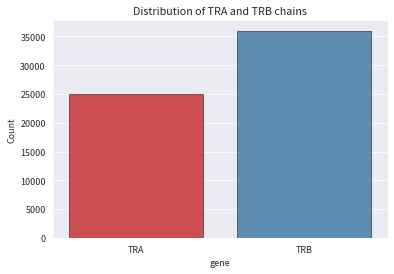

In [48]:
ax = sns.countplot(x="gene", data=df_dedup, alpha=.85)
ax.set_title('Distribution of TRA and TRB chains')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

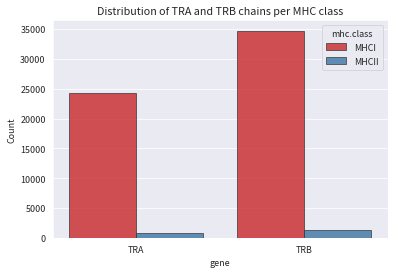

In [49]:
ax = sns.countplot(x="gene", hue="mhc.class", data=df_dedup, alpha=.85)
ax.set_title('Distribution of TRA and TRB chains per MHC class')
ax.set_ylabel('Count')

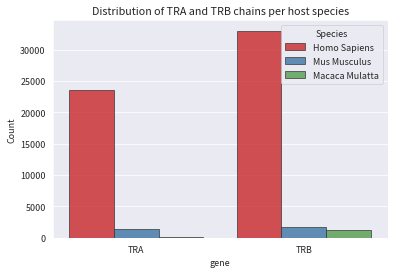

In [50]:
ax = sns.countplot(x="gene", hue="species", data=df_dedup, alpha=.85)
ax.set_title('Distribution of TRA and TRB chains per host species')
ax.set_ylabel('Count')
plt.legend(title='Species', loc='upper right', labels=['Homo Sapiens', 'Mus Musculus', 'Macaca Mulatta'])


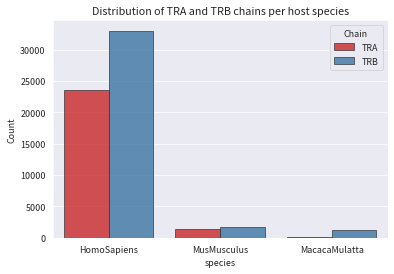

In [51]:
ax = sns.countplot(x="species", hue="gene", data=df_dedup, alpha=.85)
ax.set_title('Distribution of TRA and TRB chains per host species')
ax.set_ylabel('Count')
plt.legend(title='Chain', loc='upper right', labels=['TRA', 'TRB'])


Text(0, 0.5, 'Count')

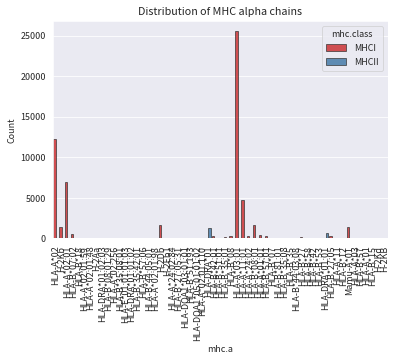

In [52]:
plt.xticks(rotation=90)
ax = sns.countplot(x="mhc.a", hue="mhc.class", data=df_dedup, alpha=.85,
#                   color=sns.color_palette("Set1")[1]
                  )
ax.set_title('Distribution of MHC alpha chains')
ax.set_ylabel('Count')

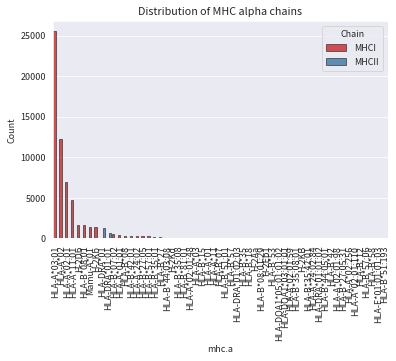

In [53]:
plt.xticks(rotation=90)
ax = sns.countplot(x="mhc.a", hue="mhc.class", data=df_dedup, alpha=.85,
                order=df_dedup["mhc.a"].value_counts().index,
#                   color=sns.color_palette("Set1")[1]
                  )
ax.set_title('Distribution of MHC alpha chains')
ax.set_ylabel('Count')
plt.legend(title='Chain', loc='upper right', labels=['MHCI', 'MHCII'])

Text(0, 0.5, 'Count')

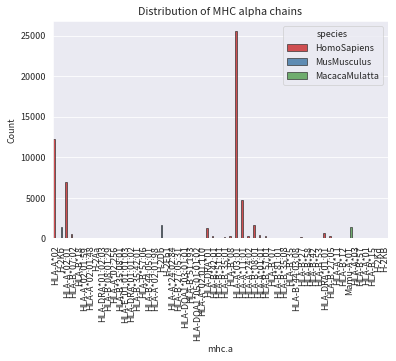

In [54]:
plt.xticks(rotation=90)
ax = sns.countplot(x="mhc.a", hue="species", data=df_dedup, alpha=.85)
ax.set_title('Distribution of MHC alpha chains')
ax.set_ylabel('Count')

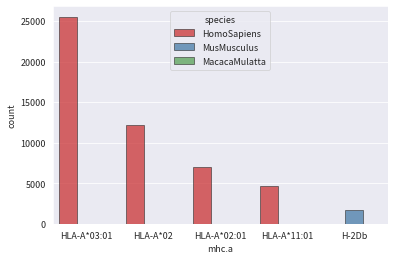

In [55]:
ax = sns.countplot(x="mhc.a", hue="species", 
                   order=df_dedup["mhc.a"].value_counts().iloc[:5].index, 
                   data=df_dedup, alpha=.75)

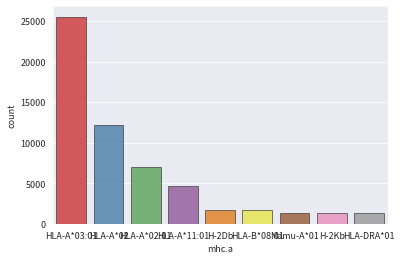

In [56]:
ax = sns.countplot(x="mhc.a", 
                   order=df_dedup["mhc.a"].value_counts().iloc[:9].index, 
                   data=df_dedup, alpha=.8)

In [57]:
# todo: MHC plot, but sort by common frequency across species, then color depending on species origin

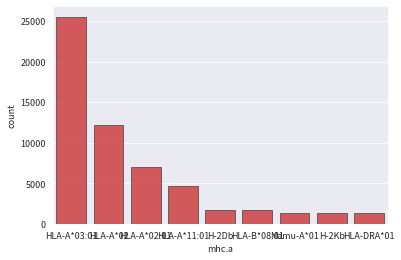

In [58]:
plt.figure()#figsize=(20,15))
ax = sns.countplot(x="mhc.a", 
                   order=df_dedup["mhc.a"].value_counts().iloc[:9].index, 
                   color=sns.color_palette("Set1")[0], 
                   data=df_dedup, alpha=.8)

## Human CDR3-epitope pairs

- Duplicates removed (last operation)
- Spurious sequences removed
- Only human
- Both TRB/TRA chains

In [59]:
# Human pairs
df_human = df.loc[ (df["species"] == "HomoSapiens") & (df["cdr3fix.good"]) ]
df_human = df_human.drop_duplicates(columns)

# also read in the data using the preprocessing script once, since it performs various checks
df_test = preprocess_vdjdb.filter_vdjdb(vdjdb_normal_path, tcr_chain="all", species="human", drop_spurious=True, mhc="all", hla="all")
assert df_test.equals(df_human[columns])

Text(0, 0.5, 'Count')

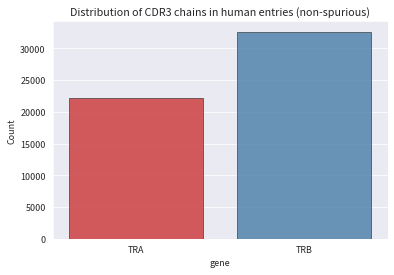

In [60]:
ax = sns.countplot(x="gene", data=df_human, alpha=.8)
ax.set_title('Distribution of CDR3 chains in human entries (non-spurious)')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

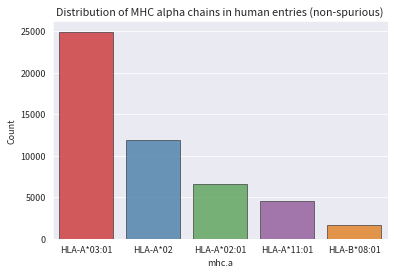

In [61]:
ax = sns.countplot(x="mhc.a", 
                   order=df_human["mhc.a"].value_counts().iloc[:5].index, 
                   data=df_human, alpha=.8)
ax.set_title('Distribution of MHC alpha chains in human entries (non-spurious)')
ax.set_ylabel('Count')

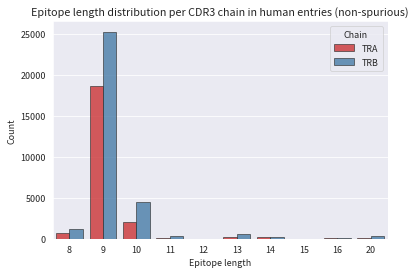

In [62]:
# epitope length
# plt.figure(figsize=(15,10))
ax = sns.countplot(x="antigen.epitope.len", data=df_human, hue="gene",
#                    order=df_human["antigen.epitope.len"].value_counts().iloc[:5].index,
                   alpha=.8)
ax.set_title('Epitope length distribution per CDR3 chain in human entries (non-spurious)')
ax.set_ylabel('Count')
ax.set_xlabel('Epitope length')
plt.legend(title='Chain', loc='upper right')

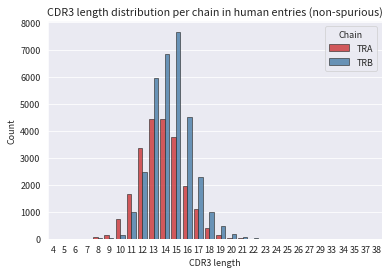

In [63]:
# cdr3 length
plt.figure()#figsize=(15,10))
ax = sns.countplot(x="cdr3.len", data=df_human, hue="gene", alpha=.8)
ax.set_title('CDR3 length distribution per chain in human entries (non-spurious)')
ax.set_ylabel('Count')
ax.set_xlabel('CDR3 length')
plt.legend(title='Chain', loc='upper right')

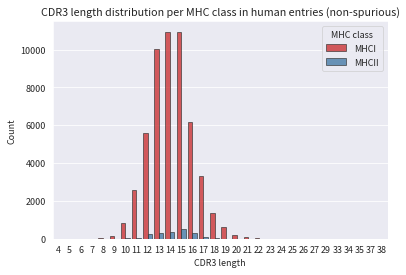

In [64]:
# cdr3 length
plt.figure()#figsize=(15,10))
ax = sns.countplot(x="cdr3.len", hue="mhc.class", data=df_human,
                   alpha=.8)
ax.set_title('CDR3 length distribution per MHC class in human entries (non-spurious)')
ax.set_ylabel('Count')
ax.set_xlabel('CDR3 length')
plt.legend(title='MHC class', loc='upper right')

In [65]:
# pairs per epitope

# df_human.groupby("antigen.epitope").size()
df_human["antigen.epitope"].value_counts()

KLGGALQAK     24041
NLVPMVATV      6514
GILGFVFTL      6389
AVFDRKSDAK     3175
ELAGIGILTV     1624
              ...  
MLWGYLQYV         1
LLFGFPVYV         1
LLFGYPRYV         1
LLFGYPVAV         1
ELAGIGALTV        1
Name: antigen.epitope, Length: 177, dtype: int64

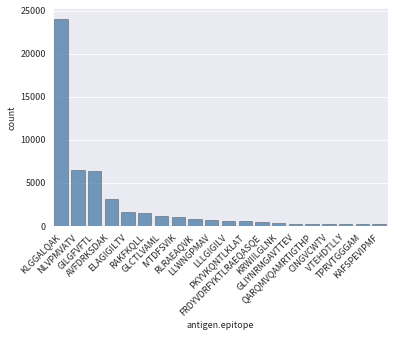

In [66]:
fig, ax = plt.subplots()#figsize=(10,5))
plt.xticks(rotation=45, ha="right")
sns.countplot(ax=ax, x='antigen.epitope', 
                   order=df_human["antigen.epitope"].value_counts().iloc[:20].index, 
                   data=df_human, 
                   edgecolor=".2", linewidth=.5, alpha=.75, color=sns.color_palette("Set1")[1])
plt.show()

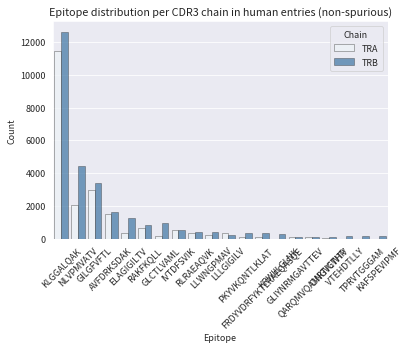

In [67]:
plt.figure()#figsize=(15,10))
plt.xticks(rotation=45)
ax = sns.countplot(x="antigen.epitope", hue="gene",
                   order=df_human["antigen.epitope"].value_counts().iloc[:20].index, 
                   data=df_human, 
                   edgecolor=".2", linewidth=.5, alpha=.75, color=sns.color_palette("Set1")[1])
ax.set_title('Epitope distribution per CDR3 chain in human entries (non-spurious)')
ax.set_ylabel('Count')
ax.set_xlabel('Epitope')
plt.legend(title='Chain', loc='upper right')

## Human TRB CDR3-epitope pairs

- Duplicates removed (last operation)
- Spurious sequences removed
- Only human
- Only TRB CDR3 sequences

In [68]:
# Human TRRB
# DONT DO THIS IN REVERSE ORDER: some entries appear to be duplicate pairs, but with differing chain / fix / species
df_human_trb = df.loc[ (df["species"] == "HomoSapiens") & (df["gene"] == "TRB") & (df["cdr3fix.good"]) ]
df_human_trb = df_human_trb.drop_duplicates(columns)

# also read in the data using the preprocessing script once, since it performs various checks
df_test = preprocess_vdjdb.filter_vdjdb(vdjdb_normal_path, tcr_chain="TRB", species="human", drop_spurious=True, mhc="all", hla="all")
assert df_test.equals(df_human_trb[columns])

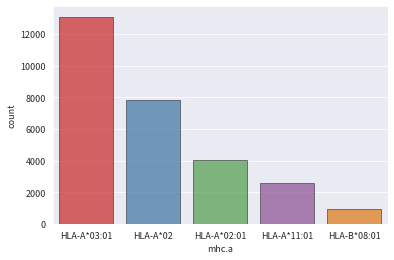

In [69]:
ax = sns.countplot(x="mhc.a", 
                   order=df_human_trb["mhc.a"].value_counts().iloc[:5].index, 
                   data=df_human_trb, 
                   alpha=.75)

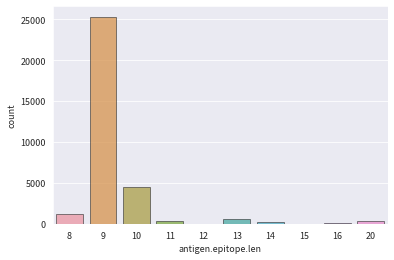

In [70]:
# epitope length
plt.figure()#figsize=(15,10))
ax = sns.countplot(x="antigen.epitope.len", data=df_human_trb,
#                    order=df_human["antigen.epitope.len"].value_counts().iloc[:5].index,
                   alpha=.75)

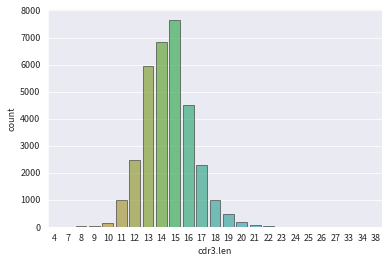

In [71]:
# cdr3 length
plt.figure()#figsize=(15,10))
ax = sns.countplot(x="cdr3.len", data=df_human_trb,
                   alpha=.75)

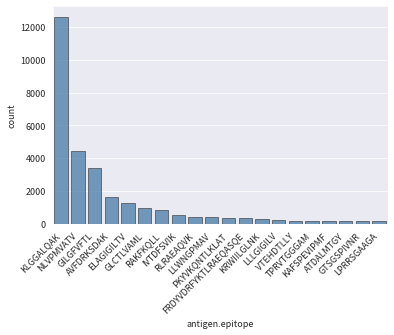

In [72]:
plt.figure()#figsize=(15,10))
plt.xticks(rotation=45, ha="right")
ax = sns.countplot(x="antigen.epitope",
                   order=df_human_trb["antigen.epitope"].value_counts().iloc[:20].index, 
                   data=df_human_trb, 
                   alpha=.75, 
                   color=sns.color_palette("Set1")[1])

In [73]:
df_human_trb["antigen.epitope"].value_counts()

KLGGALQAK         12615
NLVPMVATV          4421
GILGFVFTL          3385
AVFDRKSDAK         1641
ELAGIGILTV         1292
                  ...  
LLFGPVYV              1
HPVGDADYFEY           1
APQPELPYPQPG          1
PKYVKQNTLKLAR         1
VHFFKNIVTPRTPG        1
Name: antigen.epitope, Length: 175, dtype: int64

The over-abundant `KLGGALQAK` epitope makes up almost 40% of the human TRB unique data.

In [74]:
12615/df_human_trb.shape[0]

0.38650081191212965

## 10x data exploration

In [75]:
df_human_trb_10x_only = df.loc[(df["species"] == "HomoSapiens") & 
                          (df["gene"] == "TRB") & 
                          (df["cdr3fix.good"]) & 
                          (df["reference.id"].str.contains("10x"))]
df_human_trb_10x_only.groupby("antigen.epitope").size().sort_values(ascending=False)

antigen.epitope
KLGGALQAK      13921
AVFDRKSDAK      1750
GILGFVFTL       1339
RAKFKQLL        1234
IVTDFSVIK        718
RLRAEAQVK        430
ELAGIGILTV       328
GLCTLVAML        137
RTLNAWVKV         47
AYAQKIFKI         39
FLYALALLL         38
SLFNTVATLY        38
FLASKIGRLV        34
LLFGYPVYV         34
LLDFVRFMGV        26
FLRGRAYGL         23
KTWGQYWQV         16
CYTWNQMNL         15
QYDPVAALF         14
MLDLQPETT         14
YLLEMLWRL         13
IMDQVPFSV         12
KVLEYVIKV          8
YLNDHLEPWI         7
IPSINVHHY          7
CLLWSFQTSA         7
RMFPNAPYL          7
SLLMWITQV          6
SLFNTVATL          5
QPRAPIRPI          5
CLLGTYTQDV         3
RPPIFIRRL          3
ELRRKMMYM          2
SLYNTVATLY         2
NLVPMVATV          2
KLQCVDLHV          1
RPHERNGFTVL        1
ILKEPVHGV          1
TPRVTGGGAM         1
RIAAWMATY          1
VTEHDTLLY          1
KVAELVHFL          1
dtype: int64

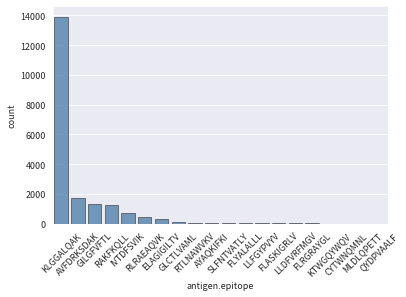

In [76]:
plt.figure()#figsize=(15,10))
plt.xticks(rotation=45)
ax = sns.countplot(x="antigen.epitope",
                   order=df_human_trb_10x_only["antigen.epitope"].value_counts().iloc[:20].index, 
                   data=df_human_trb_10x_only,
                   alpha=.75, 
                   color=sns.color_palette("Set1")[1])

Which epitopes occur exclusively in the 10x data?

In [77]:
import numpy as np
df_human_trb_10x_only["antigen.epitope"].unique()[~np.isin(df_human_trb_10x_only["antigen.epitope"].unique(),
                         df.loc[(df["species"] == "HomoSapiens") & 
                          (df["gene"] == "TRB") & 
                          (df["cdr3fix.good"]) & 
                          ~(df["reference.id"].str.contains("10x"))]
       )
]

array(['KLGGALQAK', 'CYTWNQMNL', 'RIAAWMATY', 'SLFNTVATLY', 'RLRAEAQVK',
       'LLDFVRFMGV', 'AYAQKIFKI', 'FLYALALLL', 'FLASKIGRLV', 'MLDLQPETT',
       'IMDQVPFSV', 'YLLEMLWRL', 'KVLEYVIKV', 'RTLNAWVKV', 'KTWGQYWQV',
       'YLNDHLEPWI', 'QPRAPIRPI', 'SLFNTVATL', 'CLLWSFQTSA', 'CLLGTYTQDV',
       'KVAELVHFL', 'SLYNTVATLY', 'KLQCVDLHV'], dtype=object)

In [78]:
"KLGGALQAK" in df.loc[(df["species"] == "HomoSapiens") & 
                          (df["gene"] == "TRB") & 
                          (df["cdr3fix.good"]) & 
                          ~(df["reference.id"].str.contains("10x")), "antigen.epitope"].values

False

Which epitopes do occur in both the 10x and non-10x data?

In [79]:
df_human_trb_10x_only["antigen.epitope"].unique()[np.isin(df_human_trb_10x_only["antigen.epitope"].unique(),
                         df.loc[(df["species"] == "HomoSapiens") & 
                          (df["gene"] == "TRB") & 
                          (df["cdr3fix.good"]) & 
                          ~(df["reference.id"].str.contains("10x"))]
       )
]

array(['ELAGIGILTV', 'IVTDFSVIK', 'AVFDRKSDAK', 'RAKFKQLL', 'GILGFVFTL',
       'RMFPNAPYL', 'GLCTLVAML', 'LLFGYPVYV', 'SLLMWITQV', 'IPSINVHHY',
       'QYDPVAALF', 'FLRGRAYGL', 'TPRVTGGGAM', 'ILKEPVHGV', 'RPHERNGFTVL',
       'RPPIFIRRL', 'NLVPMVATV', 'VTEHDTLLY', 'ELRRKMMYM'], dtype=object)

## Removing over-abundant 10x data entries

In [80]:
# read in data again from scratch, because duplicate removal before additional filtering can mess up the results
# Human TRB 10x
df_human_trb_10xKLGGALQAK = df.loc[(df["species"] == "HomoSapiens") & 
                                   (df["gene"] == "TRB") & 
                                   (df["cdr3fix.good"]) ]
# df_human_trb_10x = df_human_trb_10x.drop_duplicates(columns) # do this after removing everything else

The over-abundant `KLGGALQAK` epitope originates **entirely** from the 10xgenomics data.

In [81]:
# df_human_trb.loc[df_human_trb["reference.id"].str.contains("10xgenomics.com")]
df_human_trb_10xKLGGALQAK.loc[df_human_trb_10xKLGGALQAK["reference.id"] == "https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#"].shape

(20291, 57)

In [82]:
df_human_trb_10xKLGGALQAK.loc[df_human_trb_10xKLGGALQAK["reference.id"] == "https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#"].groupby("antigen.epitope").size().sort_values(ascending=False)
df_human_trb_10xKLGGALQAK.loc[df_human_trb_10xKLGGALQAK["reference.id"] == \
                 "https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#",\
                 "antigen.epitope"].value_counts()[:10]

KLGGALQAK     13921
AVFDRKSDAK     1750
GILGFVFTL      1339
RAKFKQLL       1234
IVTDFSVIK       718
RLRAEAQVK       430
ELAGIGILTV      328
GLCTLVAML       137
RTLNAWVKV        47
AYAQKIFKI        39
Name: antigen.epitope, dtype: int64

**All of the `KLGGALQAK` entries are derived from the 10x source.**

In [83]:
assert df_human_trb_10xKLGGALQAK.loc[ (df_human_trb_10xKLGGALQAK["antigen.epitope"] == "KLGGALQAK") ].shape[0] == \
        df_human_trb_10xKLGGALQAK.loc[ (df_human_trb_10xKLGGALQAK["antigen.epitope"] == "KLGGALQAK") & (df_human_trb_10xKLGGALQAK["reference.id"] == \
                 "https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#")].shape[0]

In [84]:
df_human_trb_10xKLGGALQAK.loc[(df_human_trb_10xKLGGALQAK["antigen.epitope"] == "KLGGALQAK")].groupby("reference.id").size()

reference.id
https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#    13921
dtype: int64

Removing this epitope, and then filtering out any remaining duplicates, results in the following statistics:

In [85]:
df_human_trb_10xKLGGALQAK = df_human_trb_10xKLGGALQAK.loc[~ (df_human_trb_10xKLGGALQAK["antigen.epitope"] == "KLGGALQAK") |
                 ~ (df_human_trb_10xKLGGALQAK["reference.id"] == \
                 "https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#") ]
df_human_trb_10xKLGGALQAK = df_human_trb_10xKLGGALQAK.drop_duplicates(columns)

In [86]:
df_human_trb_10xKLGGALQAK.shape

(20024, 57)

In [87]:
# also read in the data using the preprocessing script once, since it performs various checks
df_test = preprocess_vdjdb.filter_vdjdb(vdjdb_normal_path, tcr_chain="TRB", species="human", 
                                        specific_removal=["KLGGALQAK", "https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#"], 
                                        drop_spurious=True, mhc="all", hla="all")
assert df_test.equals(df_human_trb_10xKLGGALQAK[columns])

TypeError: filter_vdjdb() got an unexpected keyword argument 'specific_removal'

In [ ]:
ax = sns.countplot(x="mhc.a", 
                   order=df_human_trb_10xKLGGALQAK["mhc.a"].value_counts().iloc[:5].index, 
                   data=df_human_trb_10xKLGGALQAK, alpha=.8)

In [ ]:
# epitope length
plt.figure()#figsize=(15,10))
ax = sns.countplot(x="antigen.epitope.len", data=df_human_trb_10xKLGGALQAK,
#                    order=df_human_trb_10xKLGGALQAK["antigen.epitope.len"].value_counts().iloc[:5].index,
                   alpha=.8)
ax.set_title('Epitope length distribution in human TRB entries (non-spurious, no 10x data)')
ax.set_ylabel('Count')
ax.set_xlabel('Epitope length')

In [ ]:
# epitope length per mhc
plt.figure()#figsize=(15,10))
ax = sns.countplot(x="antigen.epitope.len", hue="mhc.class", data=df_human_trb_10xKLGGALQAK,
#                    order=df_human_trb_10xKLGGALQAK["antigen.epitope.len"].value_counts().iloc[:5].index,
                   alpha=.8)
ax.set_title('Epitope length distribution per MHC class in human TRB entries (non-spurious, no 10x data)')
ax.set_ylabel('Count')
ax.set_xlabel('Epitope length')
plt.legend(title='MHC class', loc='upper right')

In [ ]:
# cdr3 length
plt.figure()#figsize=(15,10))
ax = sns.countplot(x="cdr3.len", data=df_human_trb_10xKLGGALQAK,
                   alpha=.8)
ax.set_title('CDR3 length distribution in human TRB entries (non-spurious, no 10x data)')
ax.set_ylabel('Count')
ax.set_xlabel('CDR3 length')

In [ ]:
# cdr3 length
plt.figure()#figsize=(15,10))
ax = sns.countplot(x="cdr3.len", hue="mhc.class", data=df_human_trb_10xKLGGALQAK,
                   alpha=.8)
ax.set_title('CDR3 length distribution per MHC class in human TRB entries (non-spurious, no 10x data)')
ax.set_ylabel('Count')
ax.set_xlabel('CDR3 length')
plt.legend(title='MHC class', loc='upper right')

The number of MHCII entries is a lot lower after removing the overabundant 10x epitope.

In [ ]:
plt.figure()#figsize=(15,10))
plt.xticks(rotation=45)
ax = sns.countplot(x="antigen.epitope",
                   order=df_human_trb_10xKLGGALQAK["antigen.epitope"].value_counts().iloc[:20].index, 
                   data=df_human_trb_10xKLGGALQAK, 
                   edgecolor=".2", linewidth=.5, alpha=.75, color=sns.color_palette("Set1")[1])

## How much data is lost due to filtering on spurious entries?

Only a few hundred entries are omitted when filtering on spurious entries.

In [ ]:
df_human_trb_10xKLGGALQAK = df.loc[ (df["species"] == "HomoSapiens") & (df["gene"] == "TRB") & (df["cdr3fix.good"]) ]
df_human_trb_10xKLGGALQAK = df_human_trb_10xKLGGALQAK.loc[~ (df_human_trb_10xKLGGALQAK["antigen.epitope"] == "KLGGALQAK") |
                 ~ (df_human_trb_10xKLGGALQAK["reference.id"] == \
                 "https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#") ]
df_human_trb_10xKLGGALQAK.drop_duplicates(columns).shape

In [ ]:
df_human_trb_10xKLGGALQAK_withspurious = df.loc[ (df["species"] == "HomoSapiens") & (df["gene"] == "TRB") ]
df_human_trb_10xKLGGALQAK_withspurious = df_human_trb_10xKLGGALQAK_withspurious.loc[~ (df_human_trb_10xKLGGALQAK_withspurious["antigen.epitope"] == "KLGGALQAK") |
                 ~ (df_human_trb_10xKLGGALQAK_withspurious["reference.id"] == \
                 "https://www.10xgenomics.com/resources/application-notes/a-new-way-of-exploring-immunity-linking-highly-multiplexed-antigen-recognition-to-immune-repertoire-and-phenotype/#") ]
df_human_trb_10xKLGGALQAK_withspurious.drop_duplicates(columns).shape

# Create figures for filtered data (including length restrictions)

Currently, the length restrictions happen during the training step, so in order to get accurate statistics on the dataset these have to be excluded manually first.

In [ ]:
df_human_no10x = df.loc[(df["species"] == "HomoSapiens") & 
#                                  (df["gene"] == "TRB") & 
                                 (df["cdr3fix.good"]) & 
                                 ~(df["reference.id"].str.contains("10x"))]

df_human_no10x_size = df_human_no10x.loc[ (df_human_no10x["antigen.epitope"].str.len() >= 8) &
                                                 (df_human_no10x["antigen.epitope"].str.len() <= 13) &
                                                 (df_human_no10x["cdr3"].str.len() >= 10) &
                                                 (df_human_no10x["cdr3"].str.len() <= 20)]

df_human_no10x_size = df_human_no10x_size.drop_duplicates(columns)

print(f"Restricting on size reduced the number of unique pairs from {df_human_no10x.drop_duplicates(columns).shape[0]} to {df_human_no10x_size.shape[0]}.")
print(f"In other words, {df_human_no10x.drop_duplicates(columns).shape[0] - df_human_no10x_size.shape[0]} entries (or {(df_human_no10x.drop_duplicates(columns).shape[0] - df_human_no10x_size.shape[0]) / df_human_no10x.drop_duplicates(columns).shape[0]} %) were dropped.")

In [ ]:
df_human_trb_no10x = df.loc[(df["species"] == "HomoSapiens") & 
                                 (df["gene"] == "TRB") & 
                                 (df["cdr3fix.good"]) & 
                                 ~(df["reference.id"].str.contains("10x"))]

df_human_trb_no10x_size = df_human_trb_no10x.loc[ (df_human_trb_no10x["antigen.epitope"].str.len() >= 8) &
                                                 (df_human_trb_no10x["antigen.epitope"].str.len() <= 13) &
                                                 (df_human_trb_no10x["cdr3"].str.len() >= 10) &
                                                 (df_human_trb_no10x["cdr3"].str.len() <= 20)]

df_human_trb_no10x_size = df_human_trb_no10x_size.drop_duplicates(columns)

print(f"Restricting on size reduced the number of unique pairs from {df_human_trb_no10x.drop_duplicates(columns).shape[0]} to {df_human_trb_no10x_size.shape[0]}.")
print(f"In other words, {df_human_trb_no10x.drop_duplicates(columns).shape[0] - df_human_trb_no10x_size.shape[0]} entries (or {(df_human_trb_no10x.drop_duplicates(columns).shape[0] - df_human_trb_no10x_size.shape[0]) / df_human_trb_no10x.drop_duplicates(columns).shape[0]} %) were dropped.")

In [ ]:
df_human_trb_no10x = df.loc[(df["species"] == "HomoSapiens") & 
                                 (df["gene"] == "TRB") & 
                                 (df["cdr3fix.good"]) & 
                                 ~(df["reference.id"].str.contains("10x"))]

# does this matter? Using df indices rather than new df_human_trb_no10x?
df_human_trb_no10x_size = df_human_trb_no10x.loc[ (df["antigen.epitope"].str.len() >= 8) &
                                                 (df["antigen.epitope"].str.len() <= 13) &
                                                 (df["cdr3"].str.len() >= 10) &
                                                 (df["cdr3"].str.len() <= 20)]

df_human_trb_no10x_size = df_human_trb_no10x_size.drop_duplicates(columns)

print(f"Restricting on size reduced the number of unique pairs from {df_human_trb_no10x.drop_duplicates(columns).shape[0]} to {df_human_trb_no10x_size.shape[0]}.")
print(f"In other words, {df_human_trb_no10x.drop_duplicates(columns).shape[0] - df_human_trb_no10x_size.shape[0]} entries (or {(df_human_trb_no10x.drop_duplicates(columns).shape[0] - df_human_trb_no10x_size.shape[0]) / df_human_trb_no10x.drop_duplicates(columns).shape[0]} %) were dropped.")

## Comparison to Dean et al. negative reference TCR set

In [ ]:
negative_ref_path = PROJECT_ROOT / "data/raw/CDR3_control_sequences.tsv"
df_negative = pd.read_csv(negative_ref_path, sep="\t")
df_negative["cdr3.len"] = df_negative["CDR3_beta"].str.len()

print(df_negative.shape)
print(df_negative.drop_duplicates(subset="CDR3_beta").shape)

In [ ]:
df_negative = df_negative.loc[(df_negative["cdr3.len"] >= 10) &
                              (df_negative["cdr3.len"] <= 20)]
print(df_negative.shape)
print(df_negative.drop_duplicates(subset="CDR3_beta").shape)

In [ ]:
len(set(df_negative["CDR3_beta"]).intersection(df_human_no10x_size["cdr3"]))

## TRB only

### Epitope and CDR3 length distribution

In [ ]:
df_human_trb_no10x_size.shape

#### No grouping

In [ ]:
fig, axs = plt.subplots(2, dpi=200)#, figsize = (15,10))
fig.subplots_adjust(hspace=.4)

# cdr3 length
sns.countplot(x="cdr3.len", data=df_human_no10x_size,
              alpha=.8,
#               palette=sns.color_palette("BuGn_r", 18),
              color=sns.color_palette("BuGn_r")[2],
              ax=axs[0])
# epitope length
sns.countplot(x="antigen.epitope.len", data=df_human_no10x_size,
#                    order=df_human_trb_10x["antigen.epitope.len"].value_counts().iloc[:5].index,
              alpha=.8,
#               color=sns.color_palette("Set1")[1],
#               palette=sns.color_palette("BuGn_r", 10),
              color=sns.color_palette("BuGn_r")[2],
              ax=axs[1])

# axs[1].set_title('Epitope length distribution')#, fontsize = 14)
# axs[0].set_title('CDR3 length distribution')#, fontsize = 14)
axs[0].set_title('Sequence length distribution')
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
axs[0].set_xlabel('CDR3 length')
axs[1].set_xlabel('Epitope length')
# plt.legend(title='MHC class', loc='upper right')

# plt.savefig(PROJECT_ROOT / "reports/figures/length-distribution.png")
# plt.savefig(PROJECT_ROOT / "reports/figures/length-distribution.pdf")
# bbox_inches='tight'

#### Per MHC:

In [ ]:
fig, axs = plt.subplots(2, dpi=200, figsize=(8,8))#, figsize = (15,10))
fig.subplots_adjust(hspace=.4)

# cdr3 length
sns.countplot(x="cdr3.len", hue="mhc.class", data=df_human_trb_no10x_size,
              alpha=.8,
              palette=sns.color_palette("BuGn_r", 2),
#               color=sns.color_palette("BuGn_r")[2],
              ax=axs[0])
# epitope length
sns.countplot(x="antigen.epitope.len", hue="mhc.class", data=df_human_trb_no10x_size,
#                    order=df_human_trb_10x["antigen.epitope.len"].value_counts().iloc[:5].index,
              alpha=.8,
#               color=sns.color_palette("Set1")[1],
              palette=sns.color_palette("BuGn_r", 2),
#               color=sns.color_palette("BuGn_r")[2],
              ax=axs[1])

# axs[1].set_title('Epitope length distribution', fontsize = 14)
# axs[0].set_title('CDR3 length distribution', fontsize = 14)
axs[0].set_title('Sequence length distribution for TRB chains')
axs[0].set_ylabel('Log count')
axs[1].set_ylabel('Log count')
axs[0].set_xlabel('CDR3 length')
axs[1].set_xlabel('Epitope length')

axs[0].set(yscale="log")
axs[1].set(yscale="log")

ax.set_title('CDR3 length distribution per MHC class in human TRB entries (non-spurious, no 10x data)')
ax.set_ylabel('Count')
ax.set_xlabel('CDR3 length')
axs[0].legend(title='MHC class', loc='upper right')
axs[1].legend(title='MHC class', loc='upper right')


# plt.legend(title='MHC class', loc='upper right')

The length distribution of the epitopes of MHCII differs drastically from the non-filtered data.

In [ ]:
df_human_trb.groupby(["mhc.class", "antigen.epitope.len"]).size()

In [ ]:
df_human_trb_no10x_size.groupby(["mhc.class", "antigen.epitope.len"]).size()

## Can MHCI and MHCII share epitopes?

In [ ]:
set(df.loc[df["mhc.class"] == "MHCI", "antigen.epitope"].unique()).intersection(df.loc[df["mhc.class"] == "MHCII", "antigen.epitope"].unique())

Technically there is an overlap in the length distribution, but no epitopes are shared in the VDJdb dataset.

## TRB and TRA

### Epitope counts

In [ ]:
len(df["antigen.epitope"].unique())

In [ ]:
len(df_human_no10x["antigen.epitope"].unique())

In [ ]:
len(df_human_no10x_size["antigen.epitope"].unique())

In [ ]:
df_human_no10x_size.groupby("antigen.epitope").size().sort_values(ascending=False)

In [ ]:
df_human_no10x_size.groupby("antigen.epitope").size().sort_values(ascending=False).plot.hist()

In [ ]:
ax = sns.distplot(df_human_no10x_size.groupby("antigen.epitope").size().sort_values(ascending=False), kde=False)#, bins=500)
#                    order=df_human_no10x_size["antigen.epitope"].value_counts().iloc[:20].index, 
#                    data=df_human_no10x_size, 
#                    edgecolor=".2", linewidth=.5, 
#                    alpha=.8, color=sns.color_palette("Set1")[0])

# ax.set(yscale="log")

In [ ]:
ax = sns.countplot(x=df_human_no10x_size.groupby("antigen.epitope").size().sort_values(ascending=False),
#                    order=df_human_no10x_size["antigen.epitope"].value_counts().iloc[:20].index, 
#                    data=df_human_no10x_size, 
#                    edgecolor=".2", linewidth=.5, 
                   alpha=.8, color=sns.color_palette("Set1")[0])

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45, ha='right')
ax = sns.countplot(x="antigen.epitope",
                   order=df_human_no10x_size["antigen.epitope"].value_counts().index, 
                   data=df_human_no10x_size, 
#                    edgecolor=".2", linewidth=.5, 
                   alpha=.8, color=sns.color_palette("Set1")[0])

In [ ]:
plt.figure()#figsize=(15,10))
plt.xticks(rotation=45, ha='right')
ax = sns.countplot(x="antigen.epitope",
                   order=df_human_no10x_size["antigen.epitope"].value_counts().iloc[:20].index, 
                   data=df_human_no10x_size, 
#                    edgecolor=".2", linewidth=.5, 
                   alpha=.8, color=sns.color_palette("Set1")[0])

#### Combined figure - histogram of abundances and epitope counts

In [ ]:
from matplotlib.gridspec import GridSpec

# fig, axs = plt.subplots(nrows=3, ncols=2, squeeze=False, dpi=200, figsize=(10,8))#, figsize = (15,10))
# fig.subplots_adjust(hspace=.3, wspace=.3)

fig = plt.figure(constrained_layout=True, dpi=200, figsize=(10,5))
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# epitope distribution
sns.countplot(x="antigen.epitope",
                   order=df_human_no10x_size["antigen.epitope"].value_counts().iloc[:30].index, 
                   data=df_human_no10x_size, 
#                    edgecolor=".2", linewidth=.5, 
              alpha=.8,color="#23373b",
#               color=["#23373b"],
#               color=sns.color_palette("Set1")[0],
             ax=ax1)
ax1.tick_params(labelrotation=90)

# #23373b

ax1.set_title('Epitope abundance (30 out of 154)')
ax1.set_xlabel('Epitope')
ax1.set_ylabel("Cout")


# cdr3 length - TRB
# sns.countplot(x="cdr3.len", hue="mhc.class",
#               data=df_human_no10x_size.loc[df_human_no10x_size["gene"]=="TRB"],
#               alpha=.8, palette=sns.color_palette("BuGn_r", 3),
#               ax=ax1)



sns.distplot(df_human_no10x_size.groupby("antigen.epitope").size().sort_values(ascending=False), 
             kde=False, 
             color="#23373b",
             ax=ax2)#, bins=500)
#                    order=df_human_no10x_size["antigen.epitope"].value_counts().iloc[:20].index, 
#                    data=df_human_no10x_size, 
#                    edgecolor=".2", linewidth=.5, 
#                    alpha=.8, color=sns.color_palette("Set1")[0])
# ax.set(yscale="log")

ax2.set_title('Number of epitopes with a specific abundance')
ax2.set_xlabel('Epitope frequency')
ax2.set_ylabel('Number of epitopes')
ax2.set(yscale="log")
ax2.legend(title="154 unique epitopes", loc='upper right')


# [i.set_ylabel("Log count") for i in [ax1,ax2,ax3,ax4] ]
# [i.set(yscale="log") for i in [ax1,ax2,ax3,ax4]]
# [i.legend(title='MHC class', loc='upper right') for i in [ax1,ax2,ax3,ax4] ]


# # plt.xticks(rotation=90)#, ha='right')

# ax5.set_title('Epitope distribution per TCR chain')
# ax5.set_ylabel('Count')
# ax5.set_xlabel('Epitope')
# ax5.legend(title='TCR chain', loc='upper right')

plt.savefig(PROJECT_ROOT / "reports/figures/epitope-distribution.pdf", bbox_inches="tight")

## MHC distribution

In [ ]:
plt.figure()#figsize=(15,10))
plt.xticks(rotation=45)
ax = sns.countplot(x="mhc.a", order=df_human_no10x_size["mhc.a"].value_counts().iloc[:30].index, data=df_human_no10x_size, edgecolor=".2", linewidth=.5, alpha=.75)

In [ ]:
# fig, axs = plt.subplots(2, figsize = (15,10))
# axs[0].tick_params(axis='x', labelrotation=30)
# plt.xticks(ha='right')
# axs[1].tick_params(axis='x', labelrotation=30)
# plt.xticks(ha='right')
# sns.countplot(x="mhc.a", order=df_human_trb_10x["mhc.a"].value_counts().iloc[:30].index, 
#                    data=df_human_trb_10x, edgecolor=".2", linewidth=.5, alpha=.75,
#                   ax=axs[0])
# sns.countplot(x="mhc.a", order=df_human_trb_10x["mhc.a"].value_counts().iloc[-30:].index, 
#                    data=df_human_trb_10x, edgecolor=".2", linewidth=.5, alpha=.75,
#                   ax=axs[1])

## Combined figure

### Simple figure

In [ ]:
len(df_human_no10x_size["antigen.epitope"].unique())

In [ ]:
len(df_human_trb_no10x_size["antigen.epitope"].unique())

In [ ]:
fig, axs = plt.subplots(3, dpi=200, figsize = (10,8))
fig.subplots_adjust(hspace=.5)

# cdr3 length
sns.countplot(x="cdr3.len", hue="gene", data=df_human_no10x_size,
              alpha=.8,palette=sns.color_palette("BuGn_r", 3),
#               color=sns.color_palette("BuGn_r")[2],
              ax=axs[0])
# epitope length
sns.countplot(x="antigen.epitope.len", hue="gene", data=df_human_no10x_size,
              alpha=.8,palette=sns.color_palette("BuGn_r", 3),
#               color=sns.color_palette("BuGn_r")[2],
              ax=axs[1])


axs[0].set_title('CDR3 length distribution')
axs[1].set_title('Epitope length distribution')
axs[0].set_ylabel('Interaction count')
axs[1].set_ylabel('Interaction count')
axs[0].set_xlabel('CDR3 length')
axs[1].set_xlabel('Epitope length')
axs[0].legend(title='TCR chain', loc='upper right')
axs[1].legend(title='TCR chain', loc='upper right')

# epitope distribution
sns.countplot(x="antigen.epitope", hue="gene",
              order=df_human_no10x_size["antigen.epitope"].value_counts().iloc[:30].index, 
              data=df_human_no10x_size, 
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
#               color=sns.color_palette("BuGn_r")[1],
              ax=axs[2])

plt.xticks(rotation=90)#, ha='right')
axs[2].set_title('Epitope distribution (top 30 most abundant out of 140)')
axs[2].set_ylabel('Interaction count')
axs[2].set_xlabel('Epitope')
axs[2].legend(title='TCR chain', loc='upper right')

import string
for n, ax in enumerate(axs):
    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')
    

plt.savefig(PROJECT_ROOT / "reports/figures/vdjdb-distribution-simple.png", bbox_inches="tight")
plt.savefig(PROJECT_ROOT / "reports/figures/vdjdb-distribution-simple.pdf", bbox_inches="tight")

### Length only

In [ ]:
df_human_no10x_size.groupby("gene").size()

In [ ]:
from matplotlib.gridspec import GridSpec

fig, axs = plt.subplots(nrows=2, ncols=2, squeeze=False, dpi=200, figsize=(10,8))#, figsize = (15,10))
fig.subplots_adjust(hspace=.3, wspace=.3)


# cdr3 length - TRB
sns.countplot(x="cdr3.len", hue="mhc.class",
              data=df_human_no10x_size.loc[df_human_no10x_size["gene"]=="TRB"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 2),
              ax=axs[0,0])
# epitope length - TRB
sns.countplot(x="antigen.epitope.len", hue="mhc.class",
              data=df_human_no10x_size.loc[df_human_no10x_size["gene"]=="TRB"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 2),
              ax=axs[1,0])
# cdr3 length - TRA
sns.countplot(x="cdr3.len", hue="mhc.class",
              data=df_human_no10x_size.loc[df_human_no10x_size["gene"]=="TRA"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 2),
              ax=axs[0,1])
# epitope length - TRA
sns.countplot(x="antigen.epitope.len", hue="mhc.class",
              data=df_human_no10x_size.loc[df_human_no10x_size["gene"]=="TRA"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 2),
              ax=axs[1,1])

[axs[i,j].set_ylabel("Log count") for i in range(2) for j in range(2) ]
[axs[i,j].set(yscale="log") for i in range(2) for j in range(2) ]
[axs[i,j].legend(title='MHC class', loc='upper right') for i in range(2) for j in range(2) ]

axs[1,0].set_title('Epitope length distribution for TRB genes')
axs[1,1].set_title('Epitope length distribution for TRA genes')
axs[1,0].set_xlabel('Epitope length')
axs[1,1].set_xlabel('Epitope length')

axs[0,1].set_title('CDR3 length distribution for TRB genes')
axs[0,0].set_title('CDR3 length distribution for TRA genes')
axs[0,1].set_xlabel('CDR3 length')
axs[0,0].set_xlabel('CDR3 length')

### Chain split and per-figure MHC

In [ ]:
df_human_no10x_size.groupby("mhc.class").size()

In [ ]:
df_human_no10x_size.groupby("gene").size()

In [ ]:
from matplotlib.gridspec import GridSpec

# fig, axs = plt.subplots(nrows=3, ncols=2, squeeze=False, dpi=200, figsize=(10,8))#, figsize = (15,10))
# fig.subplots_adjust(hspace=.3, wspace=.3)

fig = plt.figure(constrained_layout=True, dpi=200, figsize=(12,10))
gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, :])


# cdr3 length - TRB
sns.countplot(x="cdr3.len", hue="mhc.class",
              data=df_human_no10x_size.loc[df_human_no10x_size["gene"]=="TRB"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
              ax=ax1)
# epitope length - TRB
sns.countplot(x="antigen.epitope.len", hue="mhc.class",
              data=df_human_no10x_size.loc[df_human_no10x_size["gene"]=="TRB"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
              ax=ax2)
# cdr3 length - TRA
sns.countplot(x="cdr3.len", hue="mhc.class",
              data=df_human_no10x_size.loc[df_human_no10x_size["gene"]=="TRA"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
              ax=ax3)
# epitope length - TRA
sns.countplot(x="antigen.epitope.len", hue="mhc.class",
              data=df_human_no10x_size.loc[df_human_no10x_size["gene"]=="TRA"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
              ax=ax4)

[i.set_ylabel("Log count") for i in [ax1,ax2,ax3,ax4] ]
[i.set(yscale="log") for i in [ax1,ax2,ax3,ax4]]
[i.legend(title='MHC class', loc='upper right') for i in [ax1,ax2,ax3,ax4] ]

ax2.set_title('Epitope length distribution for TRB genes')
ax4.set_title('Epitope length distribution for TRA genes')
ax2.set_xlabel('Epitope length')
ax4.set_xlabel('Epitope length')

ax1.set_title('CDR3 length distribution for TRB genes')
ax3.set_title('CDR3 length distribution for TRA genes')
ax1.set_xlabel('CDR3 length')
ax3.set_xlabel('CDR3 length')

# epitope distribution
sns.countplot(x="antigen.epitope", hue="gene",
              order=df_human_no10x_size["antigen.epitope"].value_counts().iloc[:30].index, 
              data=df_human_no10x_size, 
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
#               color=sns.color_palette("BuGn_r")[1],
              ax=ax5)

plt.xticks(rotation=90)#, ha='right')

ax5.set_title('Epitope distribution per TCR chain')
ax5.set_ylabel('Count')
ax5.set_xlabel('Epitope')
ax5.legend(title='TCR chain', loc='upper right')

import string
for n, ax in enumerate(fig.axes):
    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')

plt.savefig(PROJECT_ROOT / "reports/figures/vdjdb-distribution-chainsplit.png")
plt.savefig(PROJECT_ROOT / "reports/figures/vdjdb-distribution-chainsplit.pdf", bbox_inches="tight")
# bbox_inches='tight'

### MHC split and per-figure chains + more details

In [ ]:
from matplotlib.gridspec import GridSpec

# fig, axs = plt.subplots(nrows=3, ncols=2, squeeze=False, dpi=200, figsize=(10,8))#, figsize = (15,10))
# fig.subplots_adjust(hspace=.3, wspace=.3)

fig = plt.figure(constrained_layout=True, dpi=200, figsize=(12,16))
gs = GridSpec(5, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, :])
ax6 = fig.add_subplot(gs[3, :])
ax7 = fig.add_subplot(gs[4, :])


# cdr3 length - TRB
sns.countplot(x="cdr3.len", hue="gene",
              data=df_human_no10x_size.loc[df_human_no10x_size["mhc.class"]=="MHCI"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
              ax=ax1)
# epitope length - TRB
sns.countplot(x="antigen.epitope.len", hue="gene",
              data=df_human_no10x_size.loc[df_human_no10x_size["mhc.class"]=="MHCI"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
              ax=ax2)
# cdr3 length - TRA
sns.countplot(x="cdr3.len", hue="gene",
              data=df_human_no10x_size.loc[df_human_no10x_size["mhc.class"]=="MHCII"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
              ax=ax3)
# epitope length - TRA
sns.countplot(x="antigen.epitope.len", hue="gene",
              data=df_human_no10x_size.loc[df_human_no10x_size["mhc.class"]=="MHCII"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
              ax=ax4)

[i.set_ylabel("Interaction count") for i in [ax1,ax2,ax3,ax4] ]
# [i.set(yscale="log") for i in [ax1,ax2,ax3,ax4]]
[i.legend(title='TCR chain', loc='upper left') for i in [ax1,ax2,ax3,ax4] ]

ax2.set_title('Epitope length distribution for MHCI')
ax4.set_title('Epitope length distribution for MHCII')
ax2.set_xlabel('Epitope length')
ax4.set_xlabel('Epitope length')

ax1.set_title('CDR3 length distribution for MHCI')
ax3.set_title('CDR3 length distribution for MHCII')
ax1.set_xlabel('CDR3 length')
ax3.set_xlabel('CDR3 length')

# epitope distribution
sns.countplot(x="antigen.epitope", hue="gene",
              order=df_human_no10x_size["antigen.epitope"].value_counts().iloc[:30].index, 
              data=df_human_no10x_size, 
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
#               color=sns.color_palette("BuGn_r")[1],
              ax=ax5)

ax5.tick_params(labelrotation=90)
ax5.set_title('Epitope distribution (top 30 most abundant out of 140)')
ax5.set_ylabel('Interaction count')
ax5.set_xlabel('Epitope')
ax5.legend(title='TCR chain', loc='upper right')

# MHC distribution A
sns.countplot(x="mhc.a",hue="gene",
                order=df_human_no10x_size["mhc.a"].value_counts().index, 
                data=df_human_no10x_size, 
                palette=sns.color_palette("BuGn_r", 3),
                alpha=.8,
             ax=ax6)

ax6.tick_params(labelrotation=90)
ax6.set_ylabel('Interaction count')
ax6.set_xlabel('First MHC chain')
ax6.set_title('First MHC chain allele distribution')
ax6.legend(title='TCR chain', loc='upper right')


# MHC distribution B
sns.countplot(x="mhc.b",hue="gene",
                order=df_human_no10x_size["mhc.b"].value_counts().index, 
                data=df_human_no10x_size, 
                palette=sns.color_palette("BuGn_r", 3),
                alpha=.8,
             ax=ax7)

ax7.tick_params(labelrotation=90)
ax7.set_ylabel('Log interaction count')
ax7.set_xlabel('Second MHC chain')
ax7.set_title('Second MHC chain allele distribution')
ax7.legend(title='TCR chain', loc='upper right')
ax7.set(yscale="log")

import string
for n, ax in enumerate(fig.axes):
    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20, weight='bold')

plt.savefig(PROJECT_ROOT / "reports/figures/vdjdb-distribution-detailed.png")
plt.savefig(PROJECT_ROOT / "reports/figures/vdjdb-distribution-detailed.pdf", bbox_inches="tight")

## Dean reference set TCR distribution

In [ ]:
plt.figure()#figsize=(15,10))
plt.xticks(rotation=45, ha='right')
ax = sns.countplot(x="CDR3_beta",
                   order=df_negative["CDR3_beta"].value_counts().iloc[:30].index, 
                   data=df_negative, 
#                    edgecolor=".2", linewidth=.5, 
                   alpha=.8, color=sns.color_palette("Set1")[0])

In [ ]:
plt.figure()#figsize=(15,10))
plt.xticks(rotation=45, ha='right')
ax = sns.countplot(x="CDR3_beta",
                   order=df_negative["CDR3_beta"].value_counts().iloc[:-30:-1].index, 
                   data=df_negative, 
#                    edgecolor=".2", linewidth=.5, 
                   alpha=.8, color=sns.color_palette("Set1")[0])

In [ ]:
sns.distplot(df_negative.groupby("CDR3_beta").size().sort_values(ascending=False), 
             kde=False, 
             color="#23373b")

In [ ]:
df_negative.groupby("CDR3_beta").size().sort_values(ascending=False).value_counts()

In [ ]:
df_negative.shape

In [ ]:
df_negative.drop_duplicates().shape

In [ ]:
df_negative["CDR3_beta"].shape

In [ ]:
df_negative["CDR3_beta"].drop_duplicates().shape

In [ ]:
df_negative.drop_duplicates(subset="CDR3_beta").shape

# TODO

Restrict on MHCI class, because our length restriction basically cuts out the majority of MHCII.

In [ ]:
from matplotlib.gridspec import GridSpec

# fig, axs = plt.subplots(nrows=3, ncols=2, squeeze=False, dpi=200, figsize=(10,8))#, figsize = (15,10))
# fig.subplots_adjust(hspace=.3, wspace=.3)

fig = plt.figure(constrained_layout=True, dpi=200, figsize=(12,10))
gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, :])


# cdr3 length - TRB
sns.countplot(x="cdr3.len", hue="mhc.class",
              data=df_human.loc[df_human["gene"]=="TRB"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
              ax=ax1)
# epitope length - TRB
sns.countplot(x="antigen.epitope.len", hue="mhc.class",
              data=df_human.loc[df_human["gene"]=="TRB"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
              ax=ax2)
# cdr3 length - TRA
sns.countplot(x="cdr3.len", hue="mhc.class",
              data=df_human.loc[df_human["gene"]=="TRA"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
              ax=ax3)
# epitope length - TRA
sns.countplot(x="antigen.epitope.len", hue="mhc.class",
              data=df_human.loc[df_human["gene"]=="TRA"],
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
              ax=ax4)

[i.set_ylabel("Log count") for i in [ax1,ax2,ax3,ax4] ]
[i.set(yscale="log") for i in [ax1,ax2,ax3,ax4]]
[i.legend(title='MHC class', loc='upper right') for i in [ax1,ax2,ax3,ax4] ]

ax2.set_title('Epitope length distribution for TRB genes')
ax4.set_title('Epitope length distribution for TRA genes')
ax2.set_xlabel('Epitope length')
ax4.set_xlabel('Epitope length')

ax1.set_title('CDR3 length distribution for TRB genes')
ax3.set_title('CDR3 length distribution for TRA genes')
ax1.set_xlabel('CDR3 length')
ax3.set_xlabel('CDR3 length')

# epitope distribution
sns.countplot(x="antigen.epitope", hue="gene",
              order=df_human["antigen.epitope"].value_counts().iloc[:30].index, 
              data=df_human, 
              alpha=.8, palette=sns.color_palette("BuGn_r", 3),
#               color=sns.color_palette("BuGn_r")[1],
              ax=ax5)

plt.xticks(rotation=90)#, ha='right')

ax5.set_title('Epitope distribution per TCR chain')
ax5.set_ylabel('Count')
ax5.set_xlabel('Epitope')
ax5.legend(title='TCR chain', loc='upper right')

In [ ]:
df_human

In [ ]:
len(df_human["antigen.epitope"].unique())

In [ ]:
len(df_human_no10x_size["antigen.epitope"].unique())

In [89]:
df_human_no10x = df.loc[(df["species"] == "HomoSapiens") & 
#                                  (df["gene"] == "TRB") & 
                                 (df["cdr3fix.good"]) & 
                                 ~(df["reference.id"].str.contains("10x"))]

df_human_no10x_size = df_human_no10x.loc[ (df_human_no10x["antigen.epitope"].str.len() >= 8) &
                                                 (df_human_no10x["antigen.epitope"].str.len() <= 13) &
                                                 (df_human_no10x["cdr3"].str.len() >= 10) &
                                                 (df_human_no10x["cdr3"].str.len() <= 20)]

df_human_no10_size = df_human_no10x.loc[(df_human_no10x["gene"] == "TRB")]

df_human_no10x_size = df_human_no10x_size.drop_duplicates(columns)

df_human_no10x_size.shape

(20646, 57)

In [51]:

import json

import pandas as pd
from pandas.io.json import json_normalize
from pathlib import Path

from src.config import PROJECT_ROOT
from src.preprocessing import preprocess_vdjdb
# import dataset again to start fresh
vdjdb_normal_path = PROJECT_ROOT / "data/raw/vdjdb/vdjdb-2019-08-08/vdjdb.txt"
df = pd.read_csv(vdjdb_normal_path, sep="\t")

# expand the json/dict-like columns
df = (
    df.join(json_normalize(df["method"].apply(lambda x: json.loads(r'{}'.format(x)))).add_prefix("method."))
    .join(json_normalize(df["meta"].apply(lambda x: json.loads(r'{}'.format(x)))).add_prefix("meta."))
    .join(json_normalize(df["cdr3fix"].apply(lambda x: json.loads(r'{}'.format(x)))).add_prefix("cdr3fix."))
    .drop(["method", "meta", "cdr3fix"], axis=1)
)

columns = ["cdr3", "antigen.epitope"]

# create column based on cdr3 and epitope sequences
df["merged"] = df["cdr3"] + "-" + df["antigen.epitope"]

# create length columns for figures
df["cdr3.len"] = df["cdr3"].str.len()
df["antigen.epitope.len"] = df["antigen.epitope"].str.len()

In [52]:
df = df.loc[df["gene"] == "TRB"]
df.shape

(44378, 57)

In [53]:
df = df.loc[df["species"] == "HomoSapiens"]
df.shape

(39771, 57)

In [54]:
df = df.loc[df["cdr3fix.good"]]
df.shape

(39302, 57)

In [55]:
df = df.loc[
                ~(df["reference.id"].str.contains("|".join(["10xgenomics"])))
#             ~(df["reference.id"].str.contains("10xgenomics"))
        ]
df.shape

(19011, 57)

In [56]:
df = df.loc[
            (df["cdr3"].str.len() >= 10)
            & (df["cdr3"].str.len() <= 20)
            & (df["antigen.epitope"].str.len() >= 8)
            & (df["antigen.epitope"].str.len() <= 13)
        ]
df.shape

(18102, 57)

In [57]:
df.drop_duplicates(["cdr3","antigen.epitope"]).shape

(14725, 57)

In [1]:
from src.config import PROJECT_ROOT
import src.preprocessing.preprocess_vdjdb

In [48]:
df = src.preprocessing.preprocess_vdjdb.filter_vdjdb(
    input=PROJECT_ROOT / "data/raw/vdjdb/vdjdb-2019-08-08/vdjdb.txt",
    tcr_chain="all",
    species="human",
    drop_spurious=True,
    mhc="all",
    hla="all",
#     specific_removal_epitope_reference="10xgenomics sdgfjhdsfgds",
    specific_removal_references=["10xgenomics"],
    keep_specific_references=None,
    length_restriction="10 20 8 13",
)

In [40]:
df.shape

(20646, 2)

In [58]:
negative_ref_path = PROJECT_ROOT / "data/raw/CDR3_control_sequences.tsv"
df_negative = pd.read_csv(negative_ref_path, sep="\t")
df_negative["cdr3.len"] = df_negative["CDR3_beta"].str.len()

print(df_negative.shape)
print(df_negative.drop_duplicates(subset="CDR3_beta").shape)

(500000, 4)
(487437, 4)
